In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


In [71]:
df=pd.read_csv("Customer Data.csv")

In [72]:
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [73]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [74]:
df.describe(include="O")

CUST_ID
count     8950
unique    8950
top     C10001
freq         1

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [76]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [77]:
df["MINIMUM_PAYMENTS"]=df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"]=df["CREDIT_LIMIT"].fillna(df["MINIMUM_PAYMENTS"].mean())

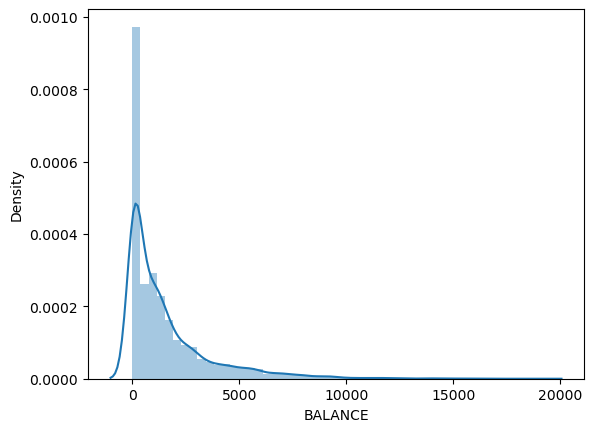

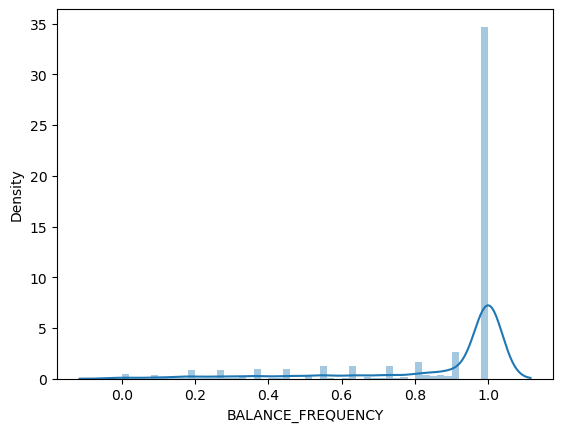

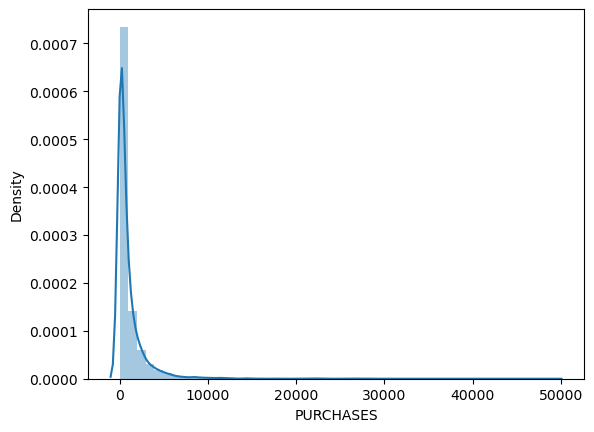

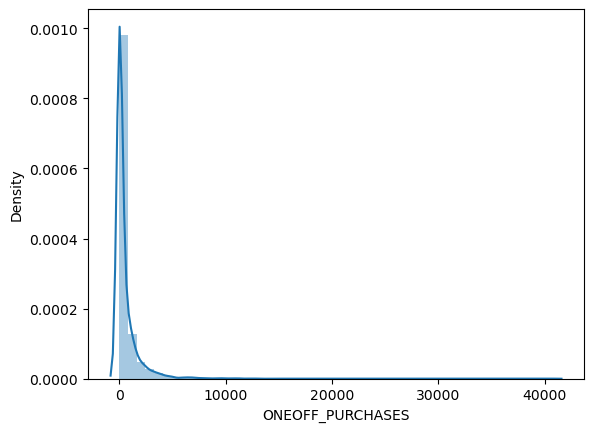

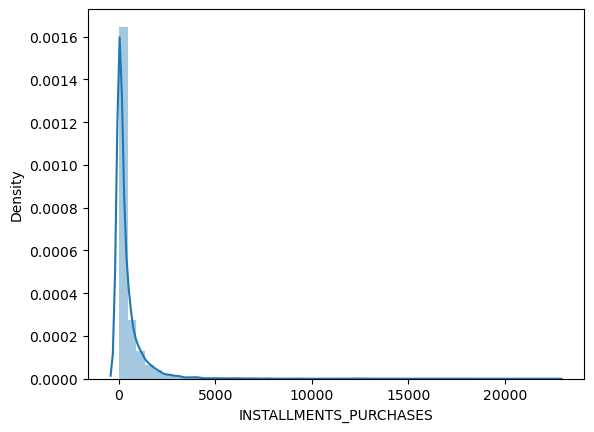

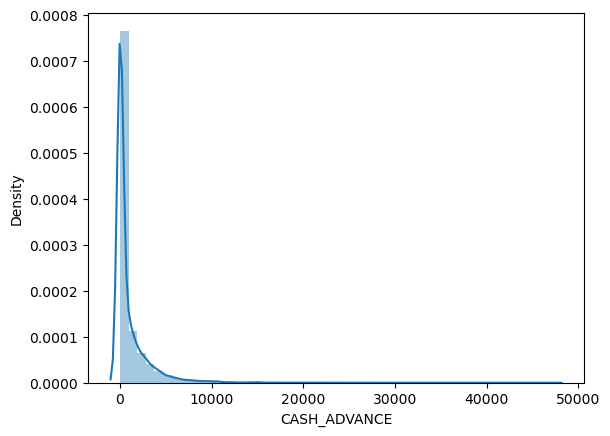

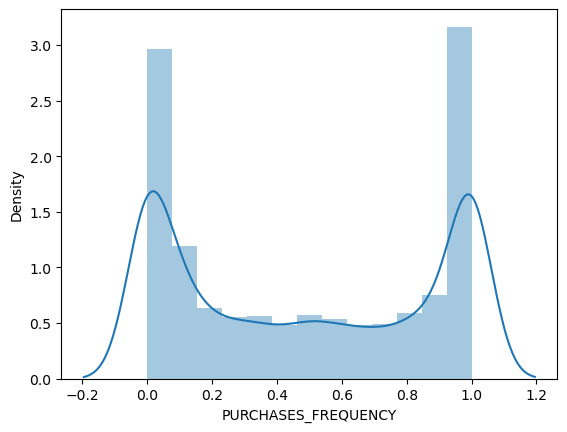

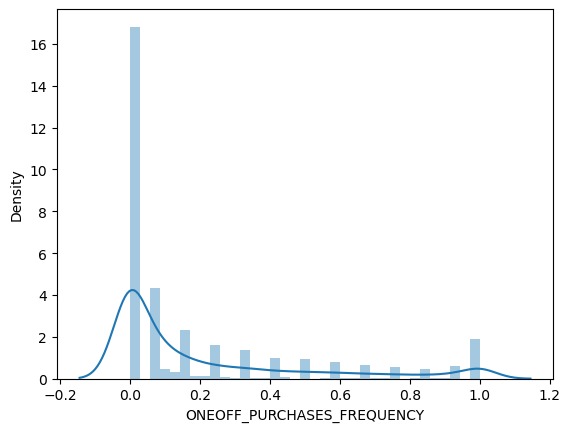

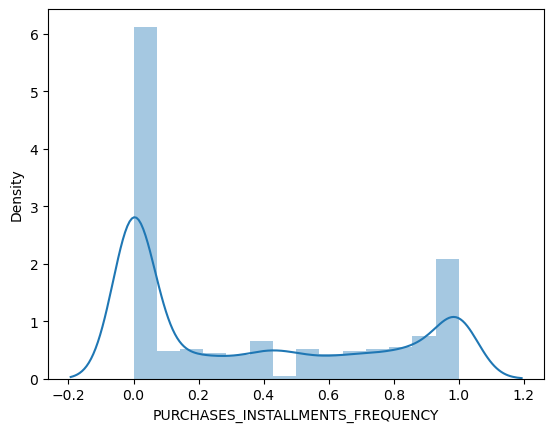

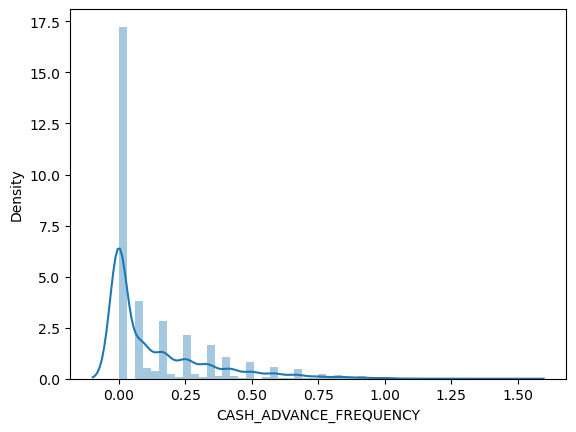

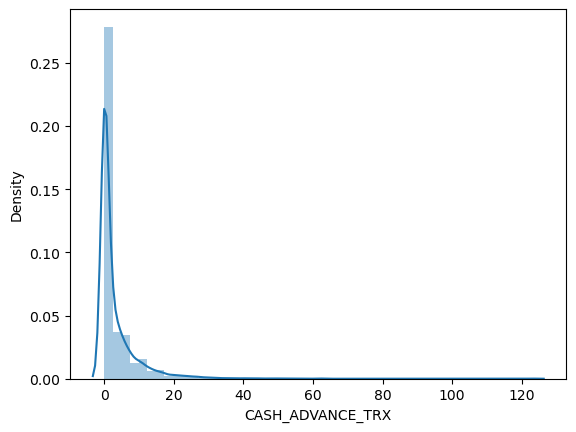

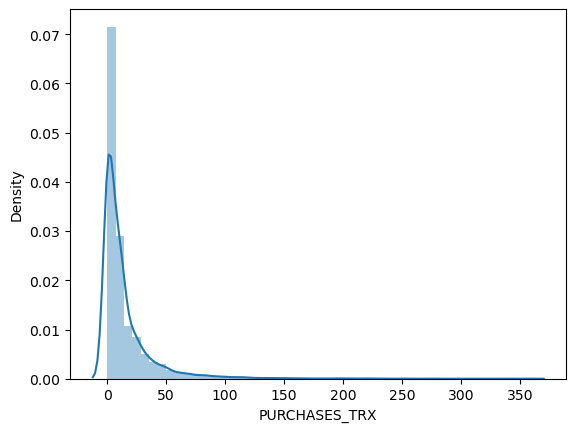

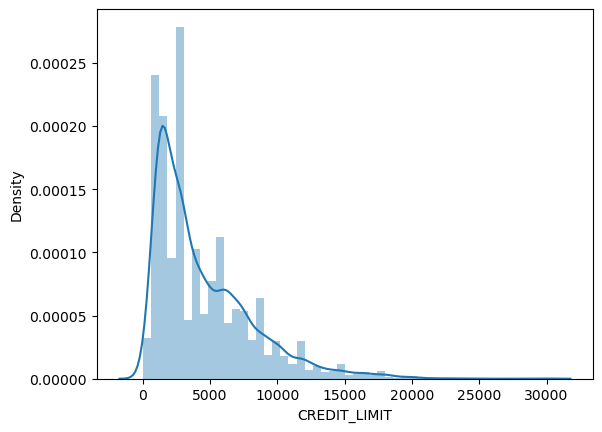

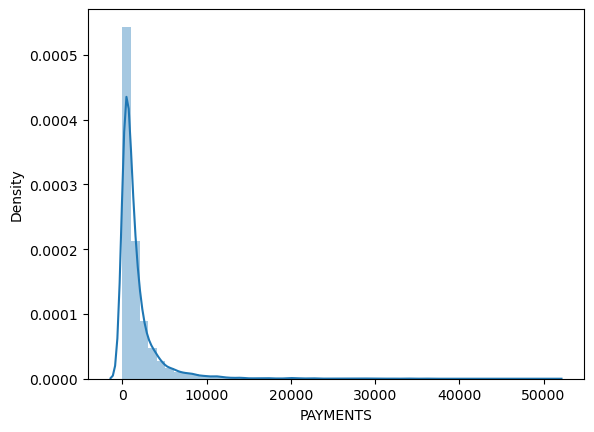

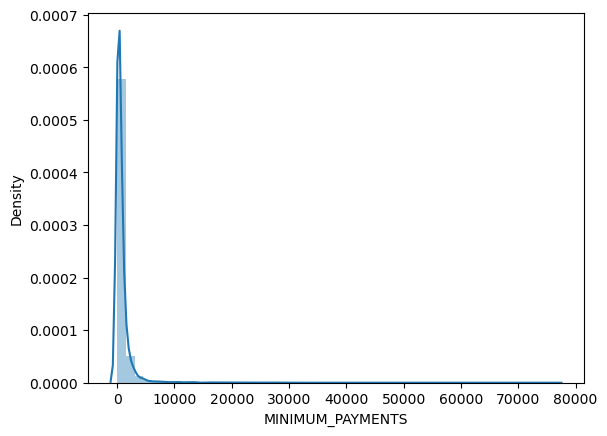

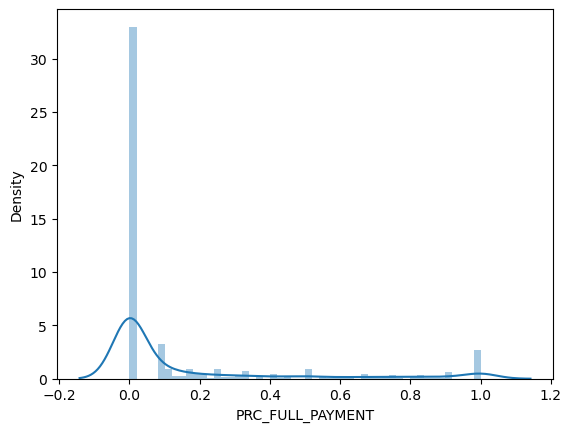

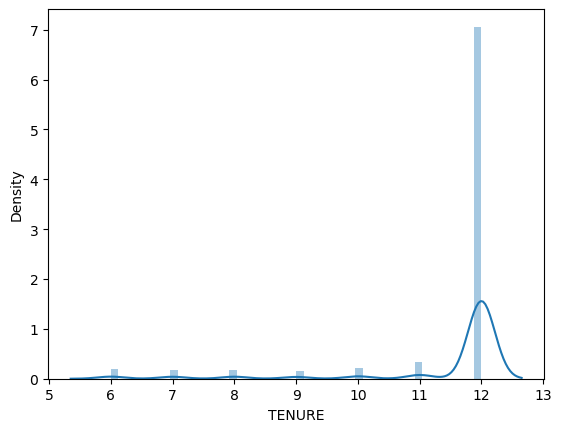

In [78]:
#Univariate Analysis
numeric_columns=df.select_dtypes(exclude="object").columns
for i in numeric_columns:
    sns.distplot(df[i])
    plt.show()
    
    
    

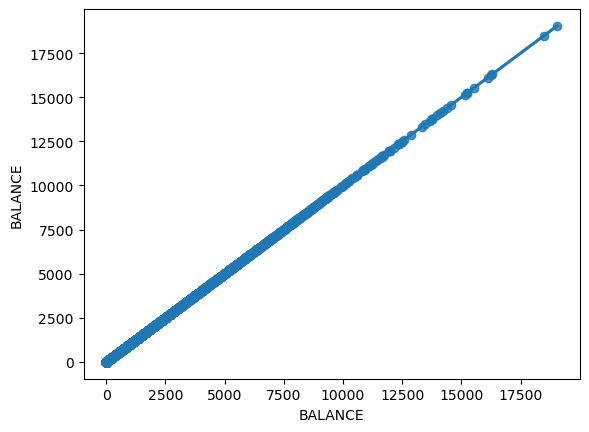

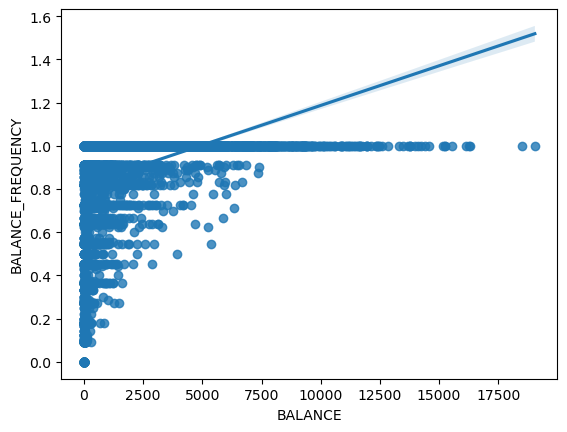

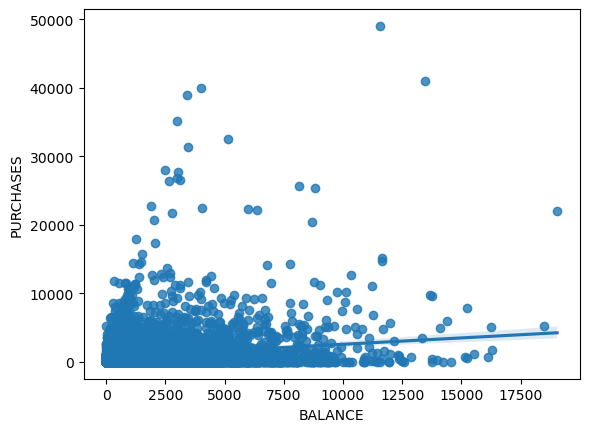

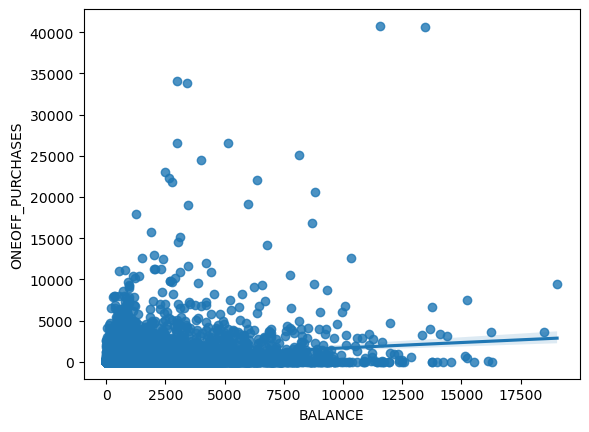

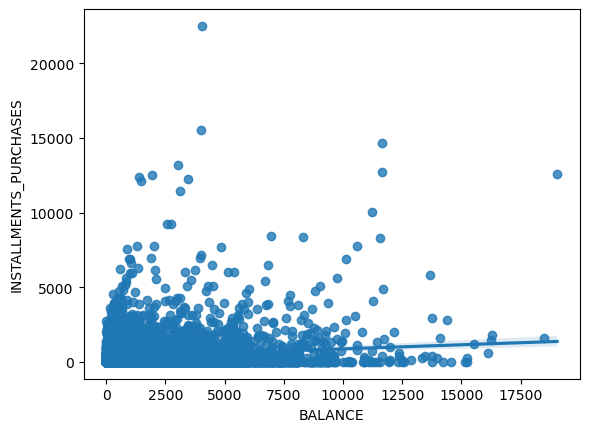

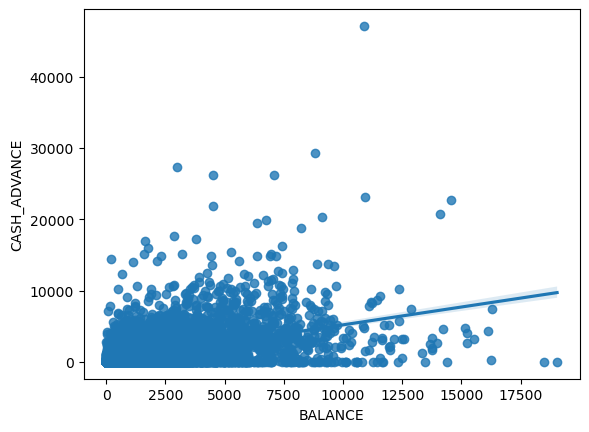

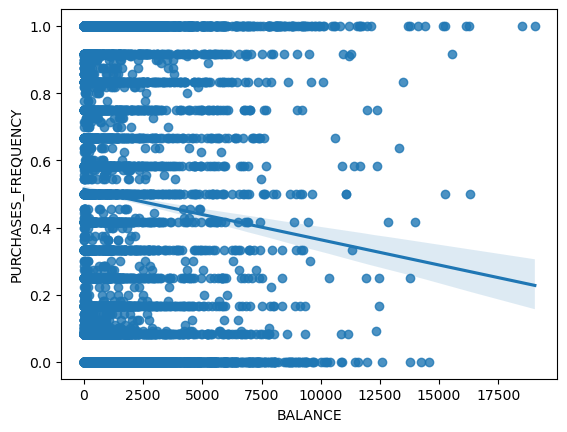

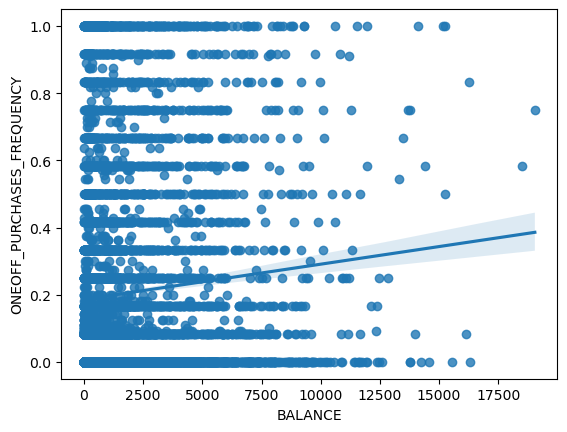

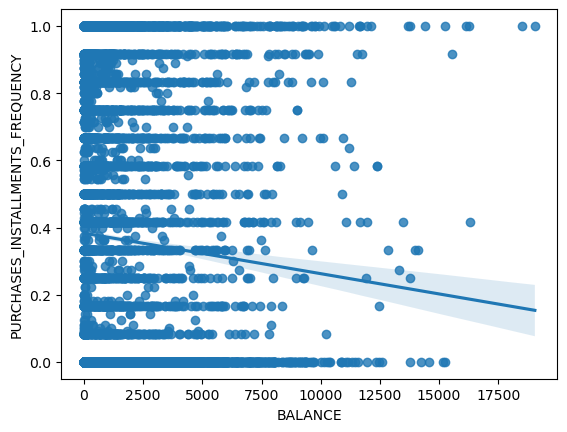

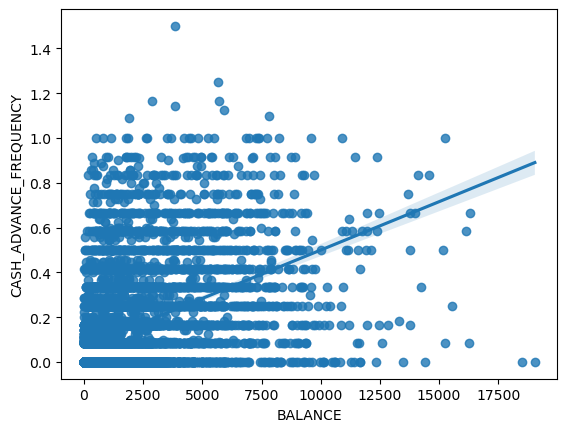

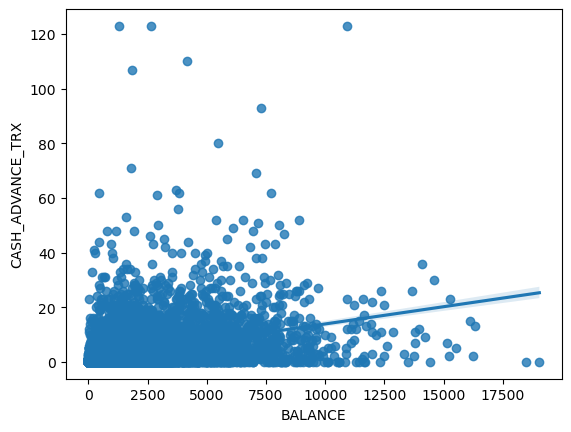

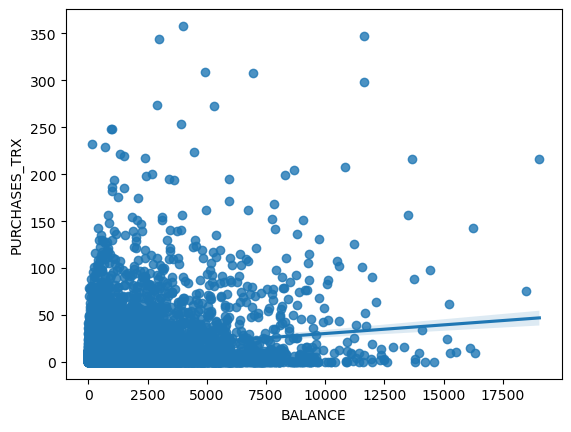

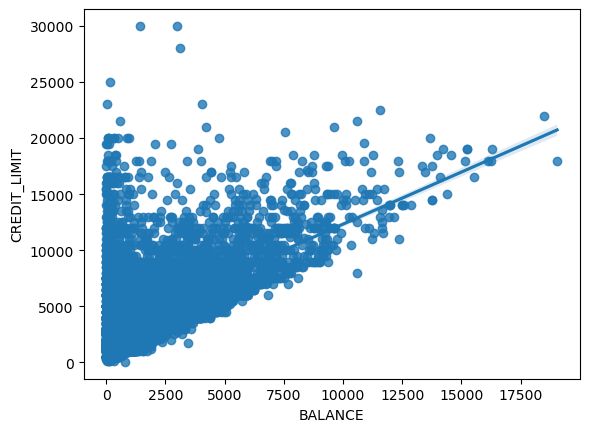

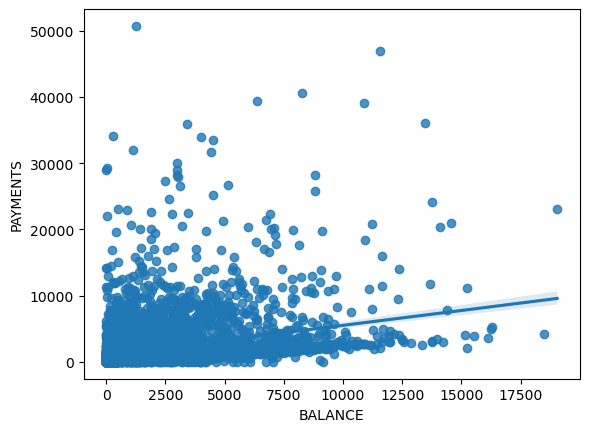

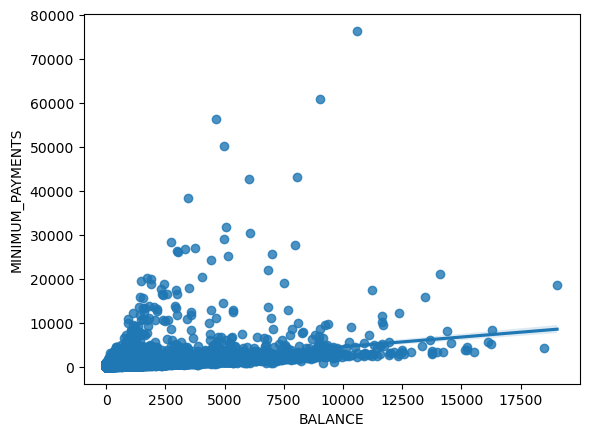

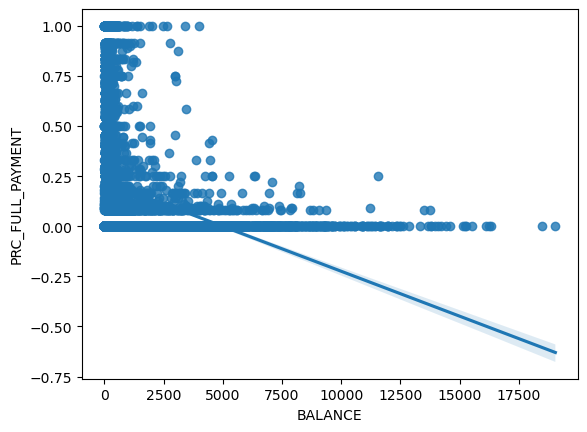

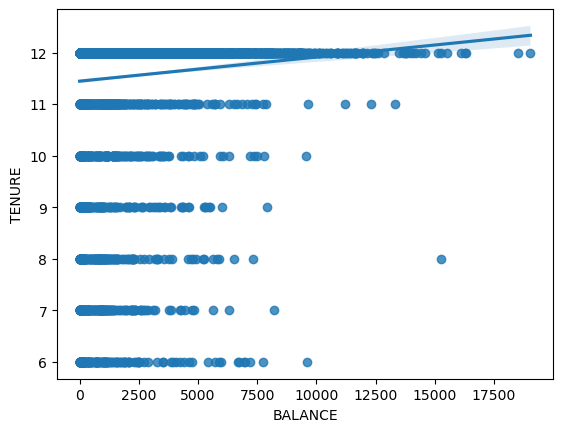

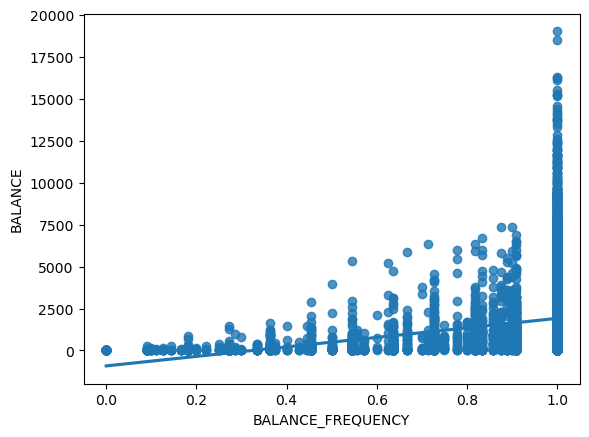

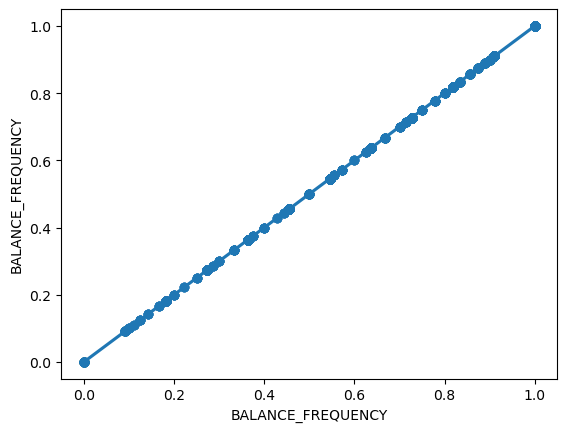

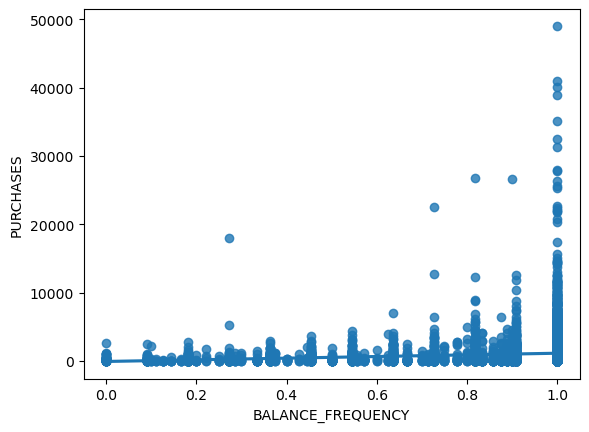

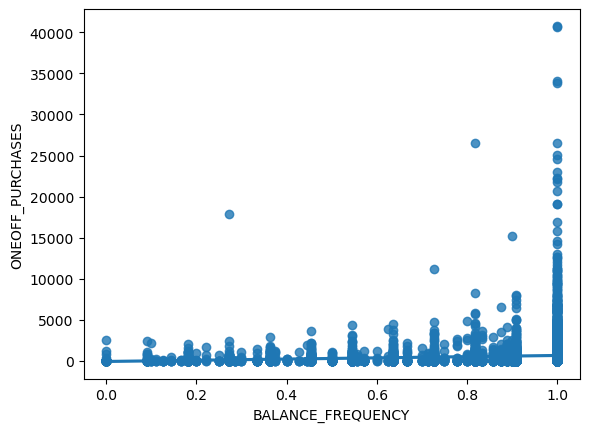

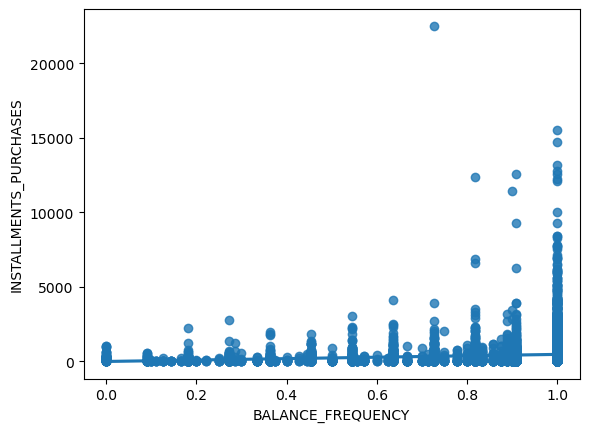

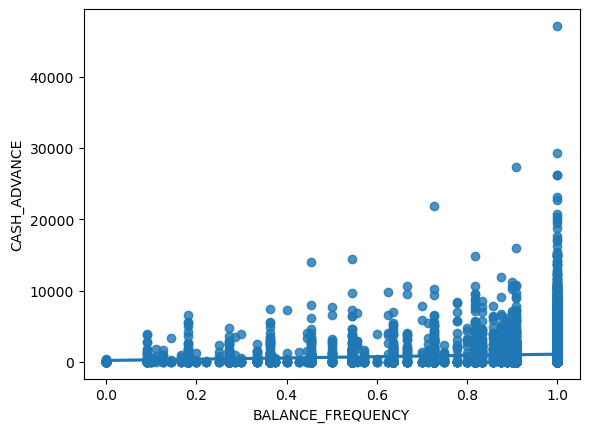

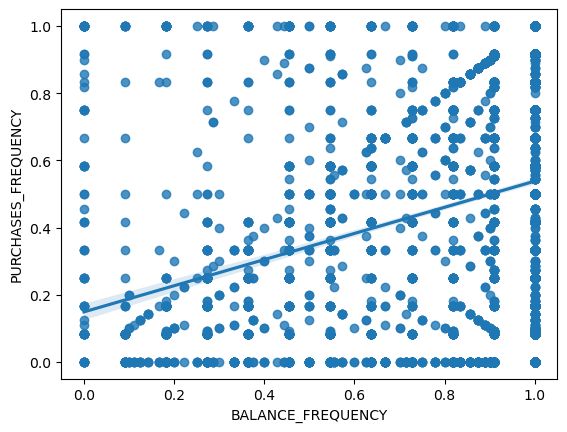

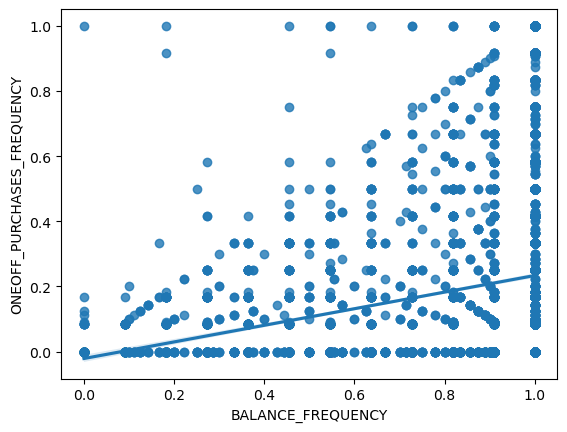

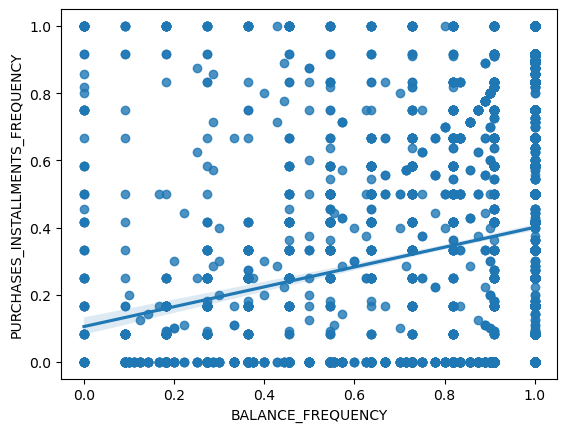

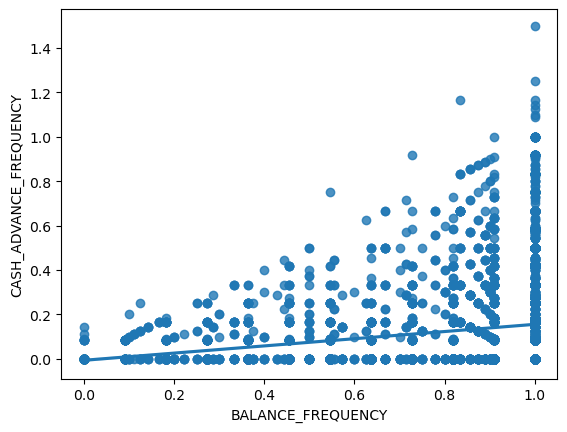

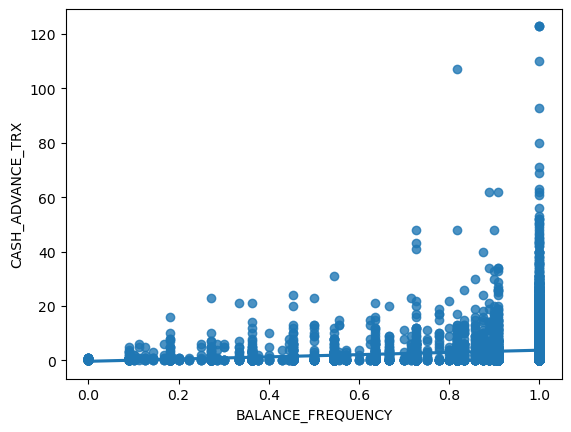

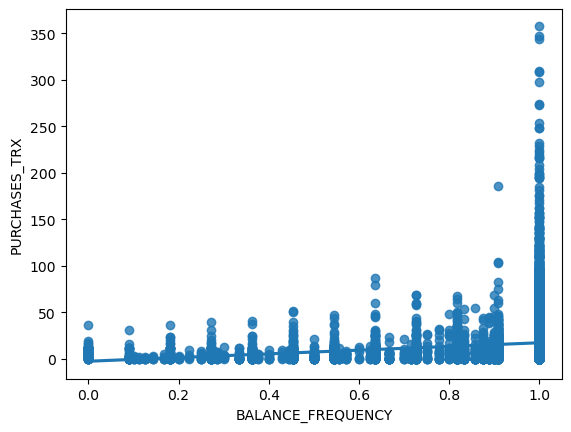

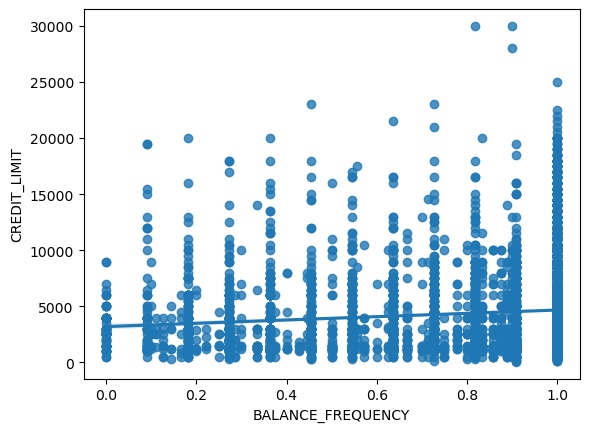

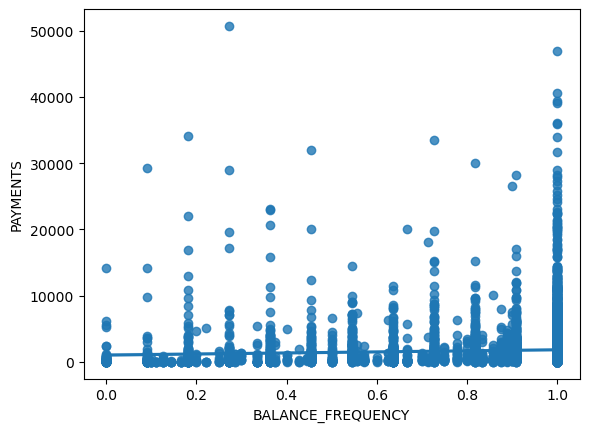

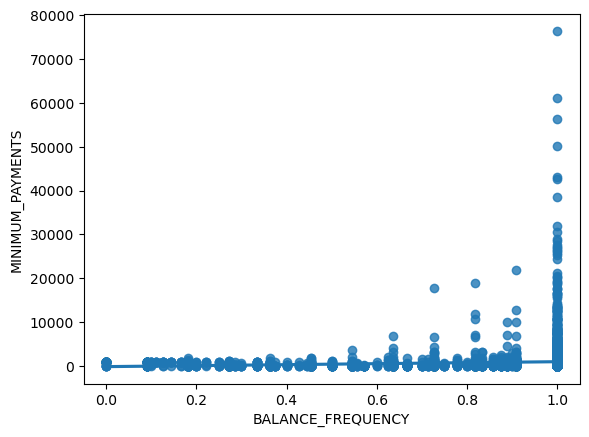

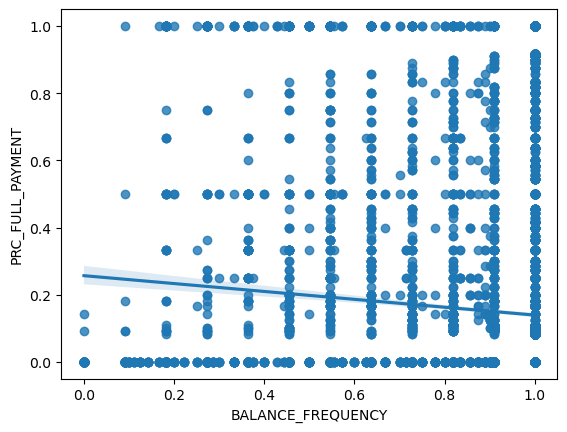

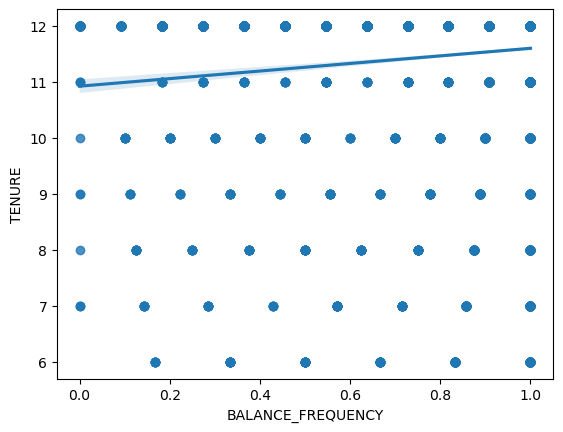

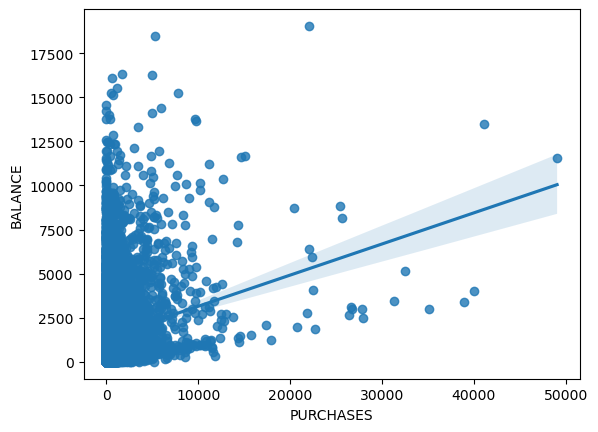

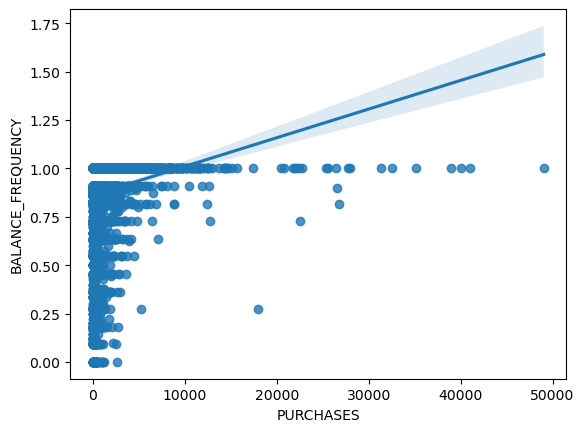

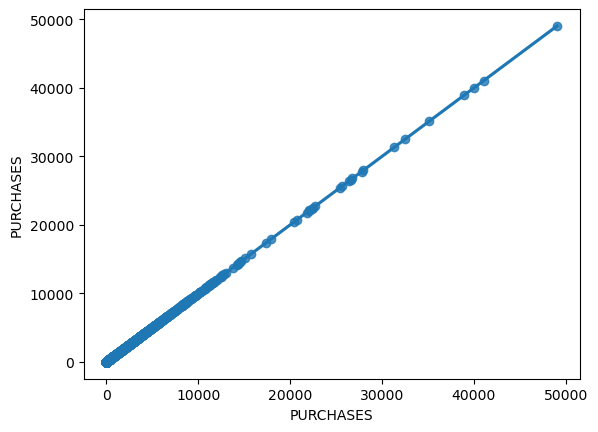

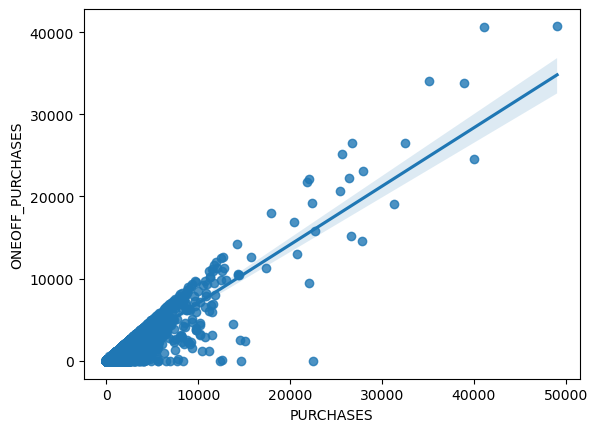

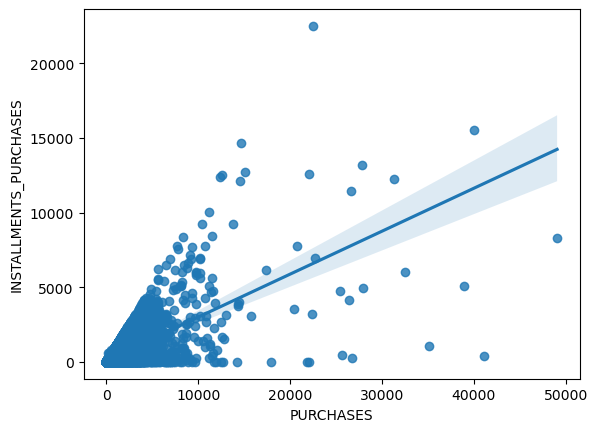

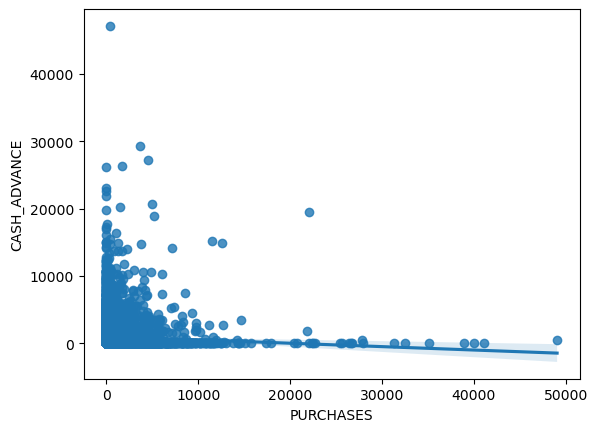

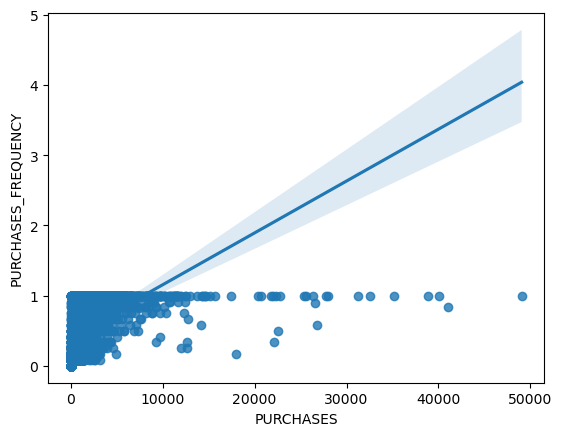

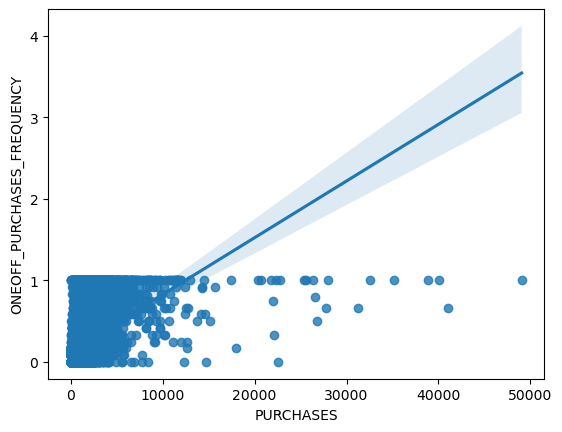

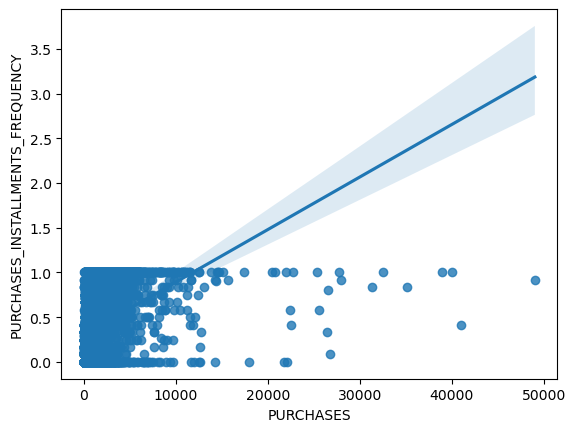

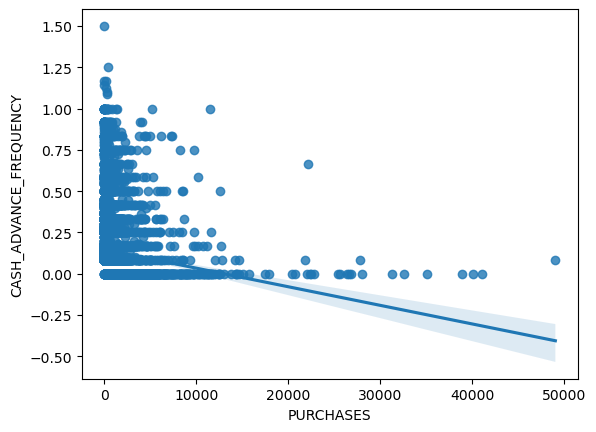

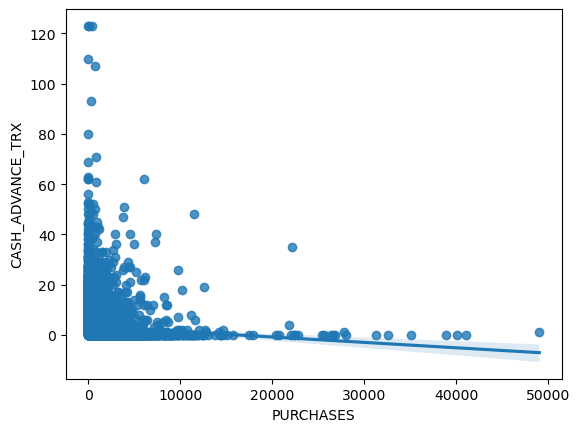

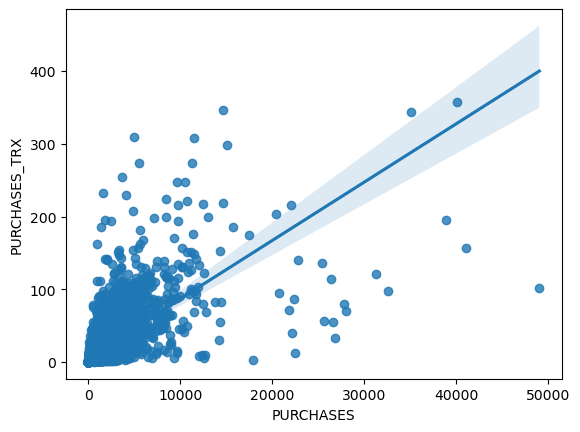

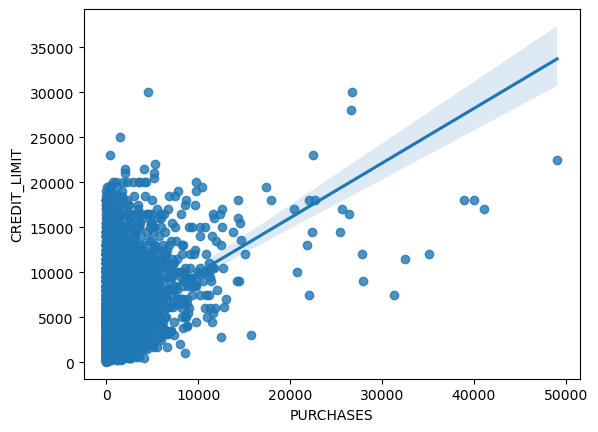

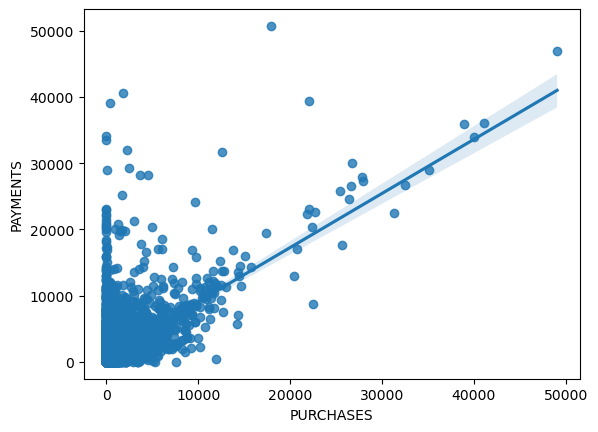

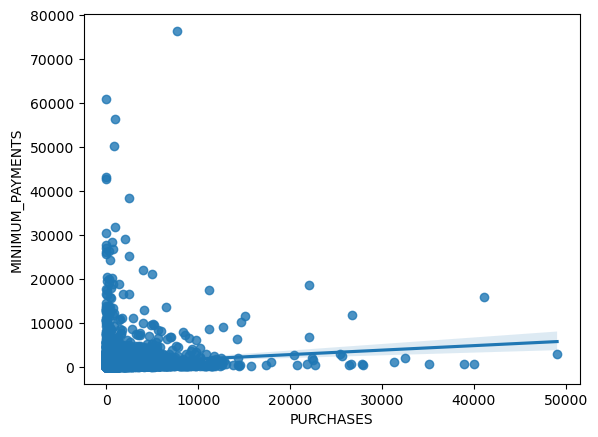

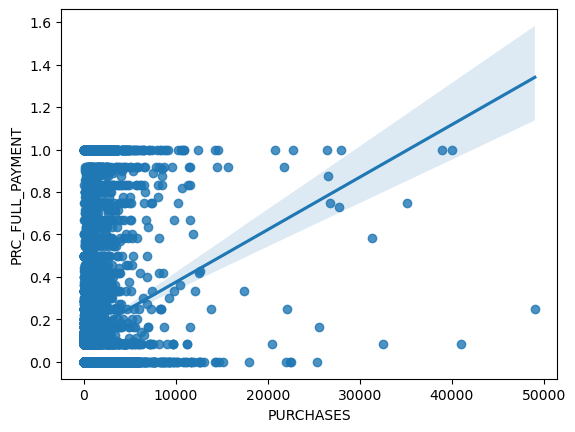

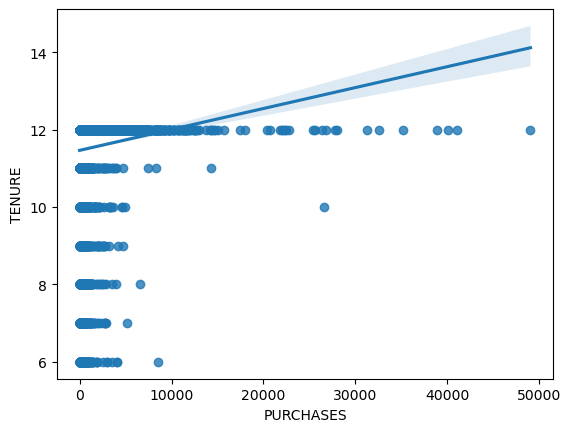

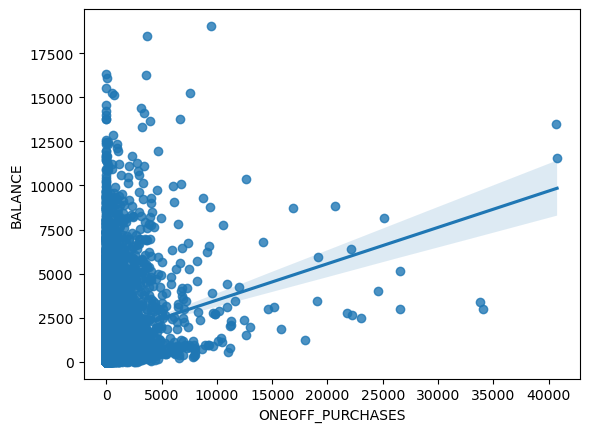

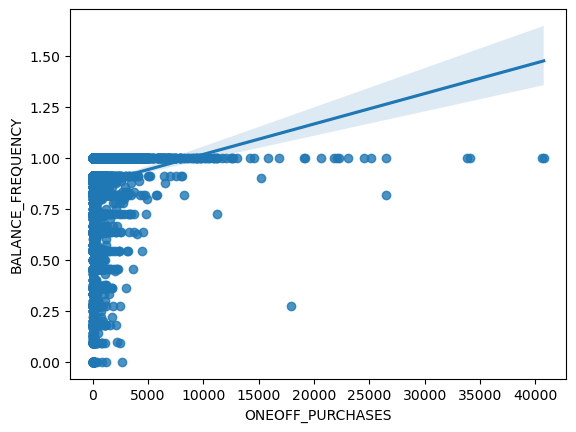

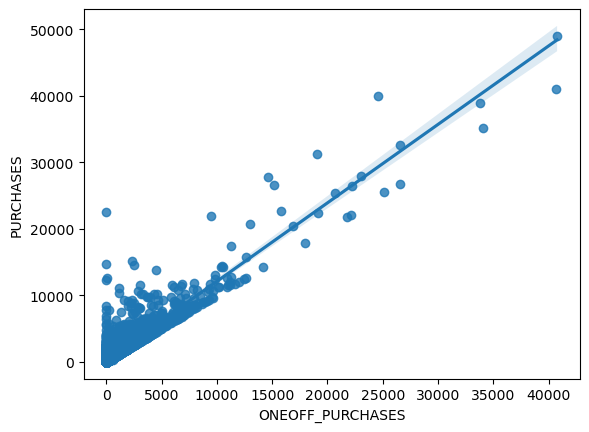

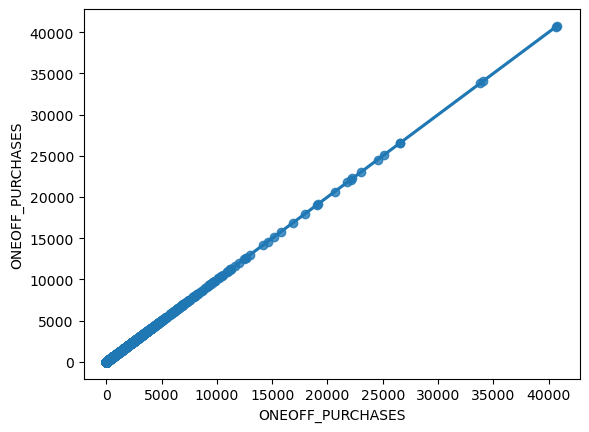

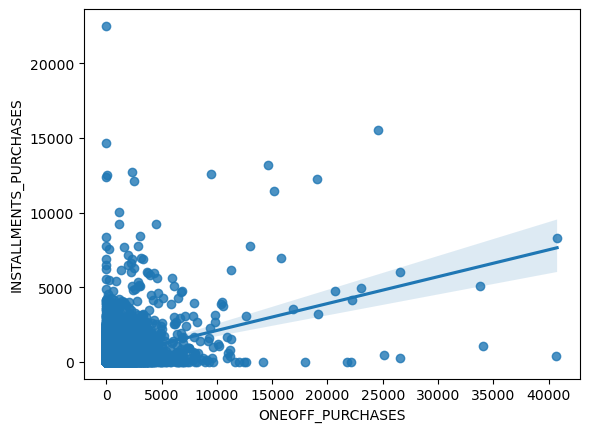

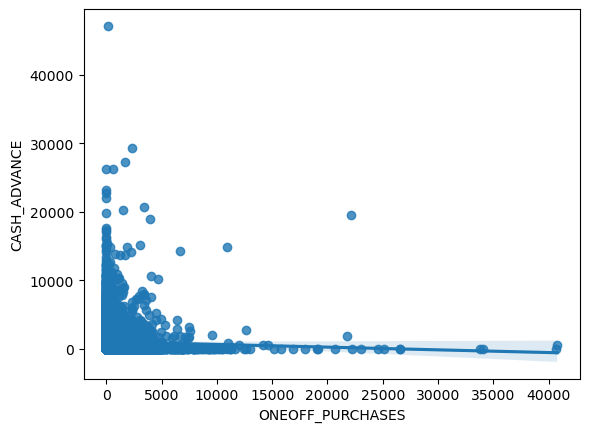

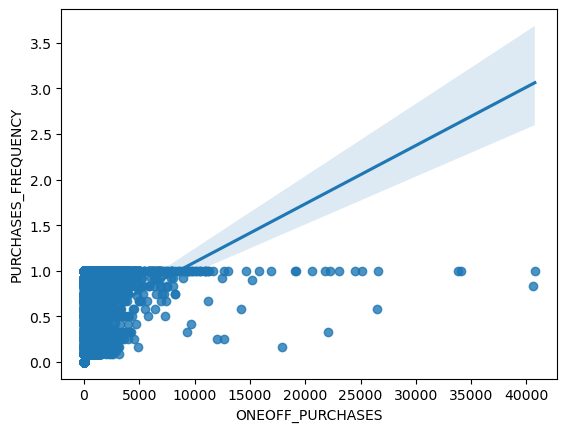

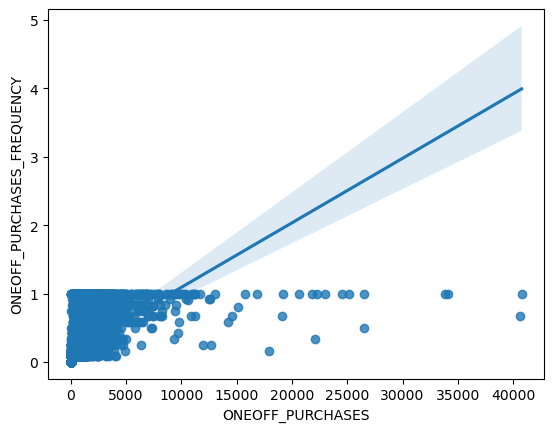

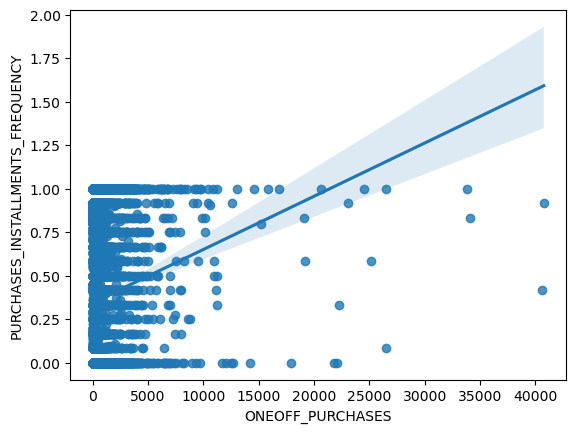

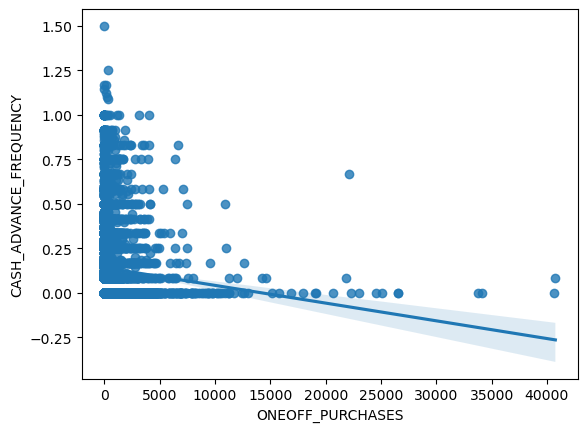

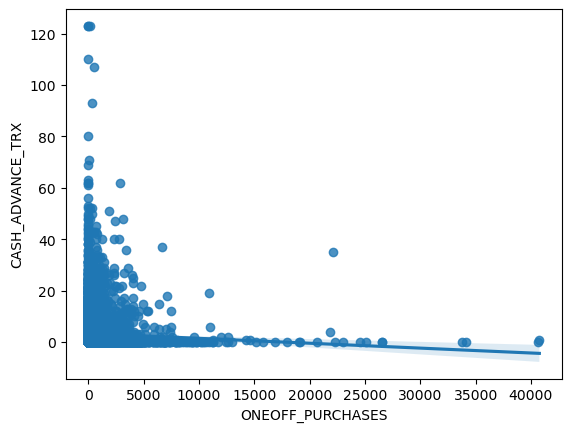

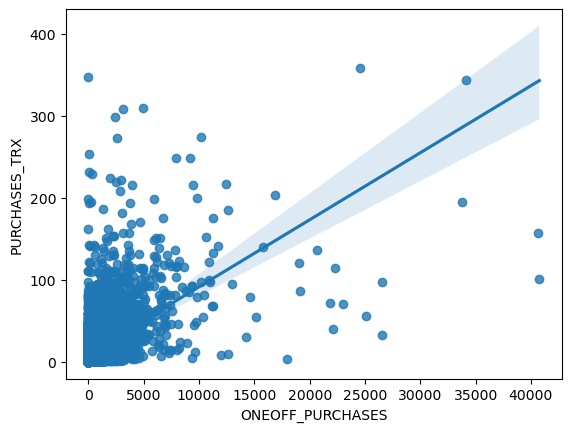

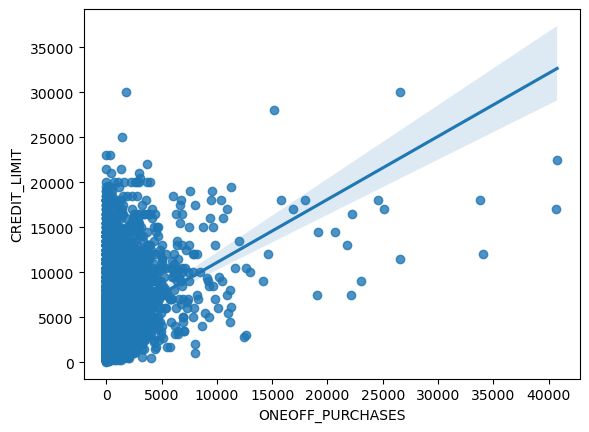

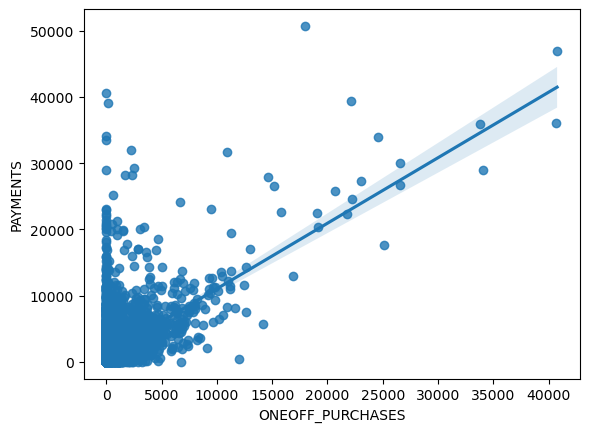

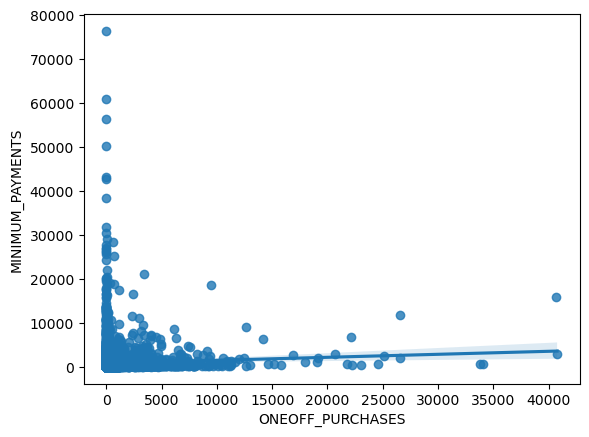

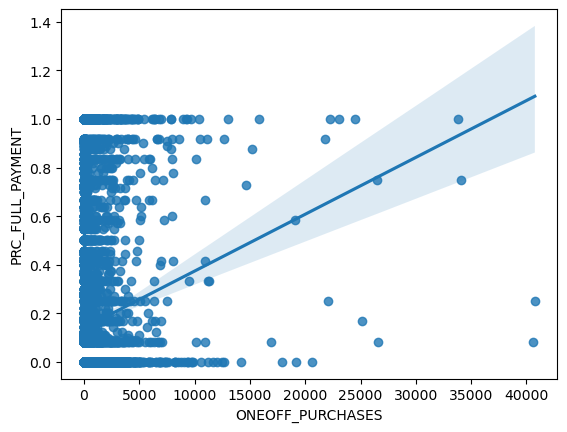

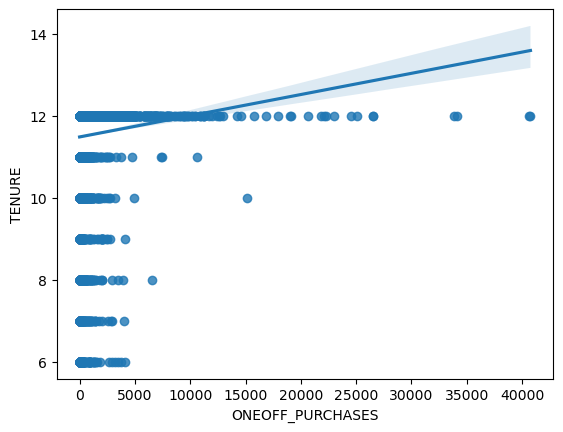

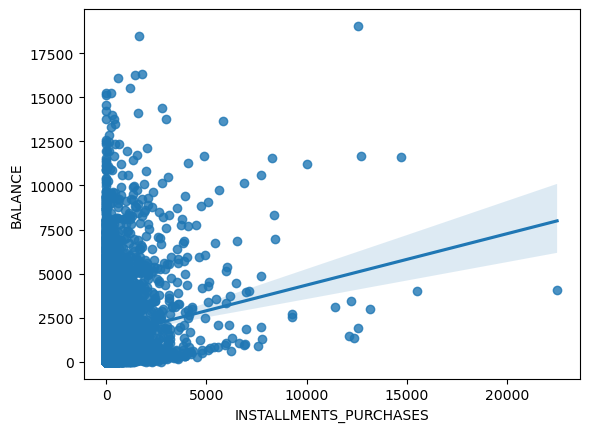

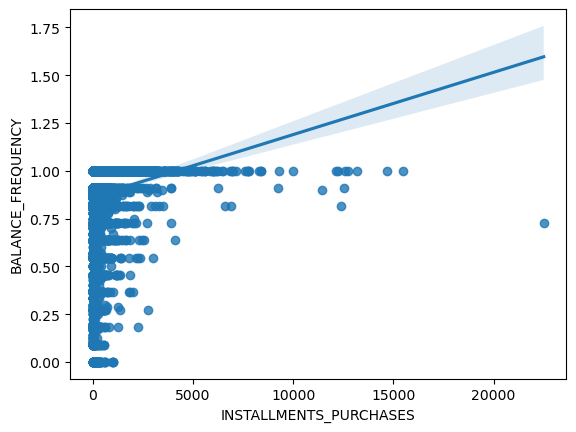

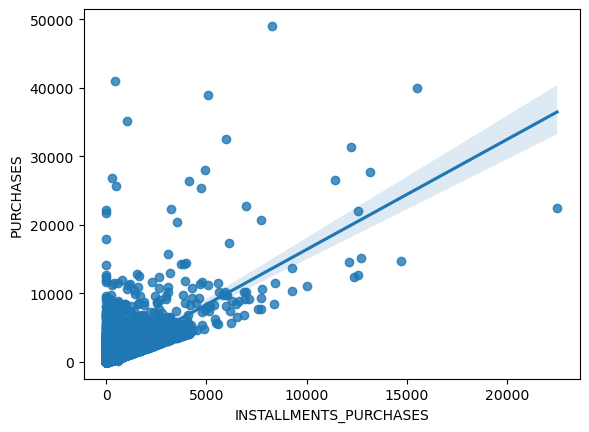

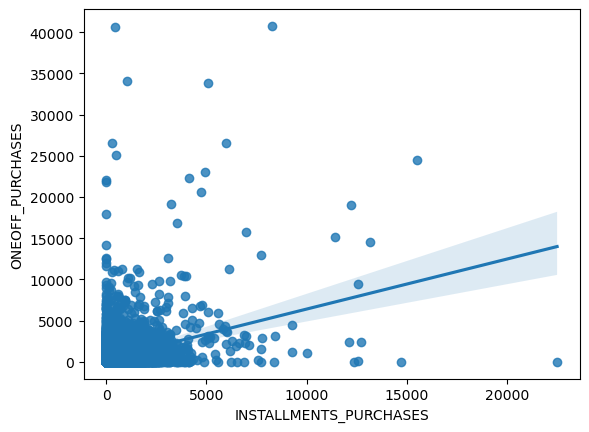

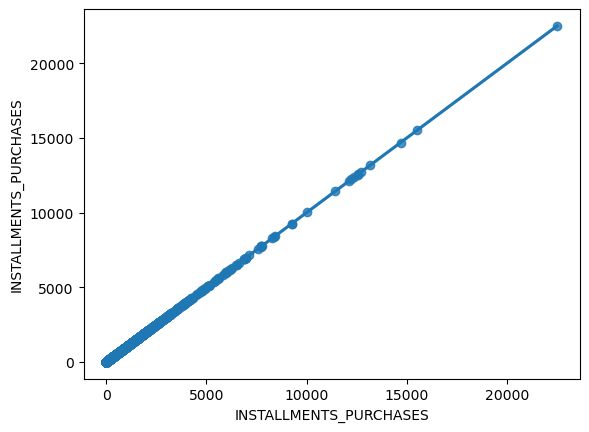

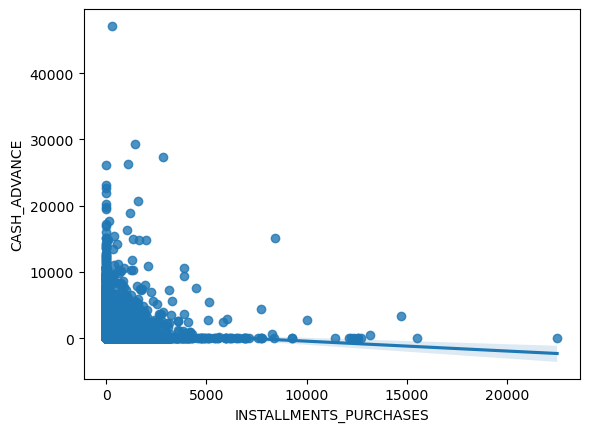

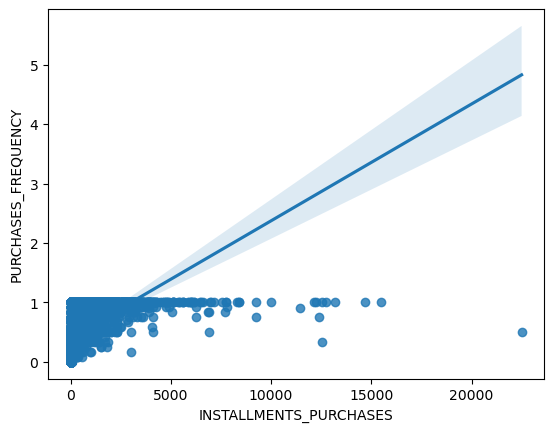

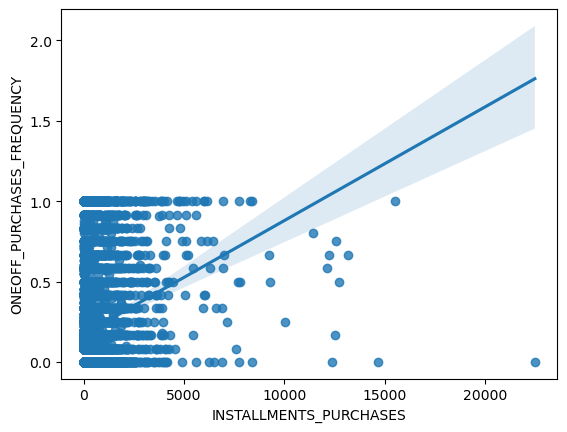

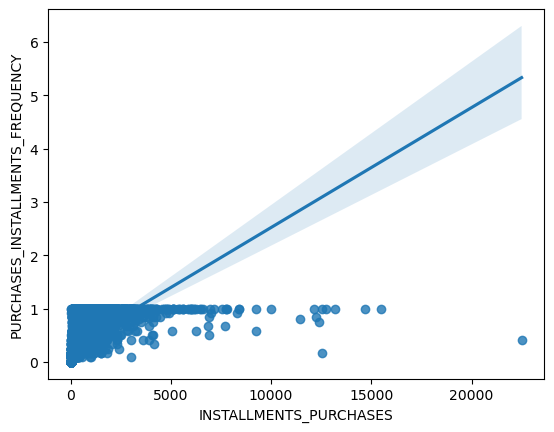

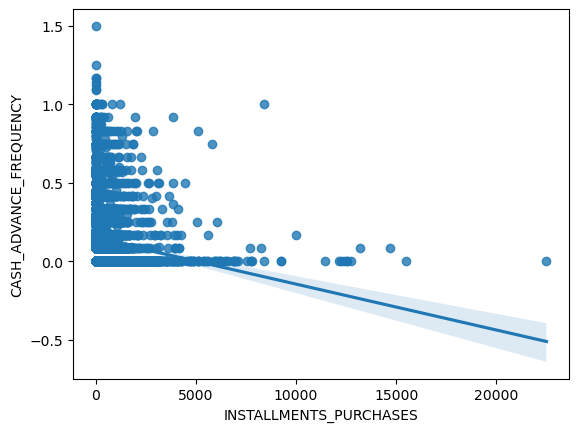

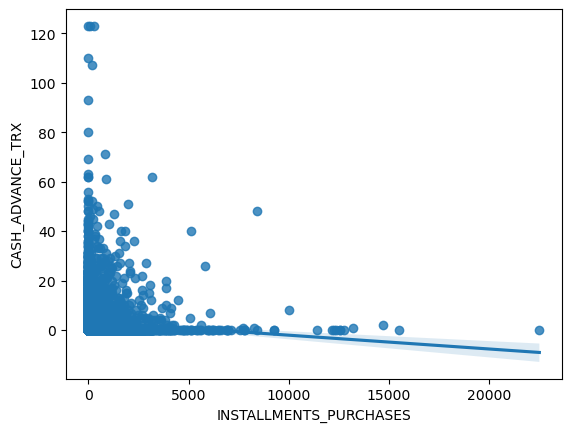

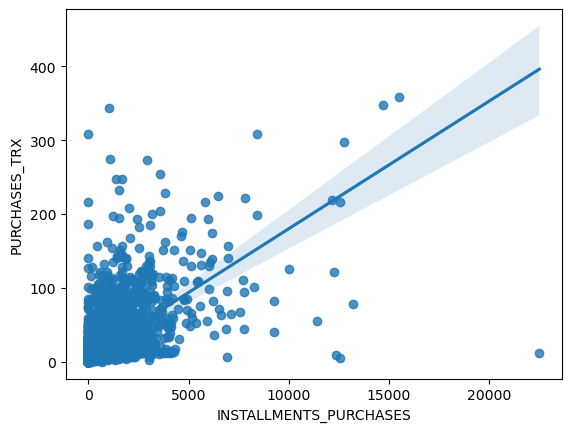

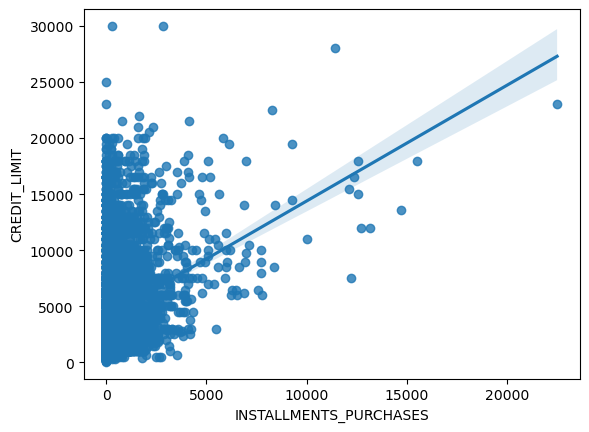

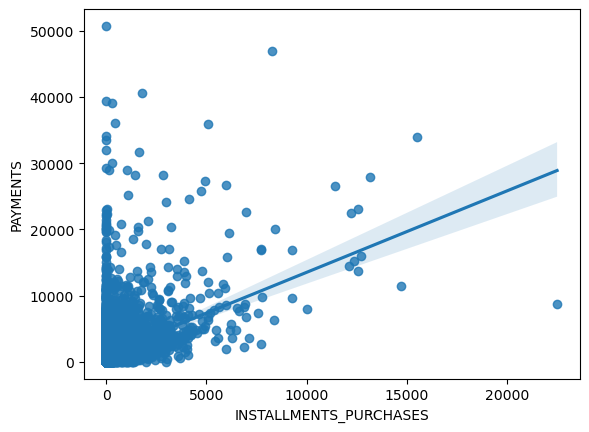

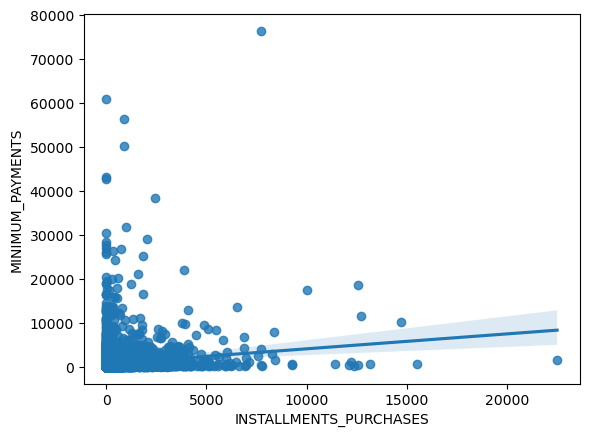

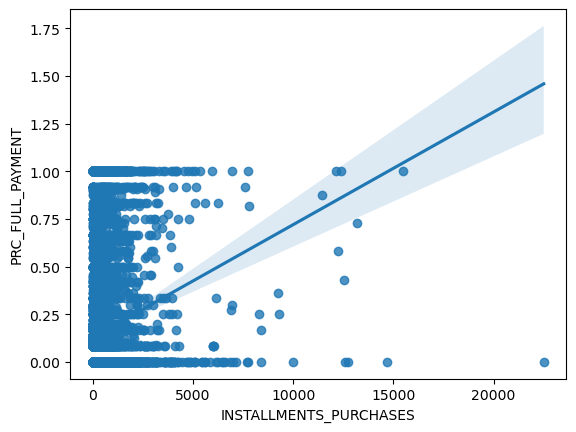

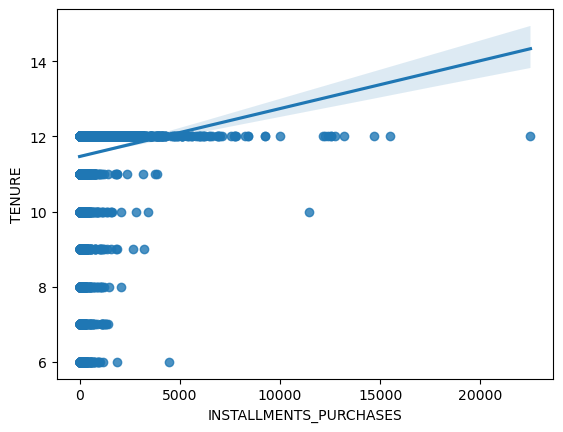

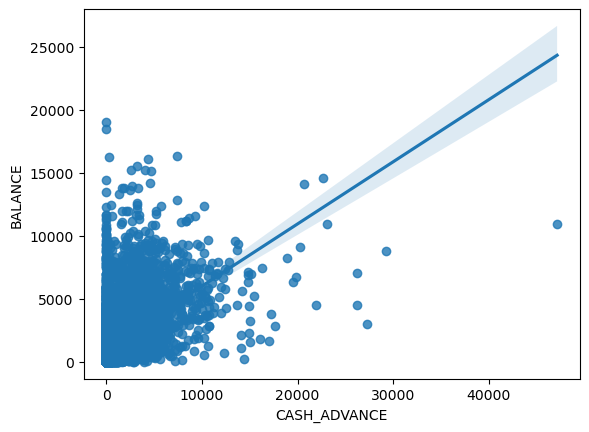

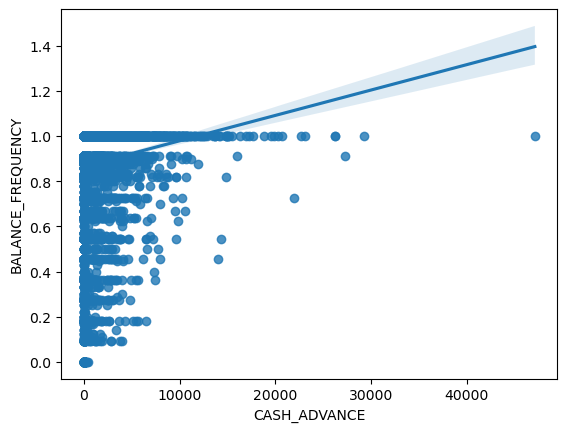

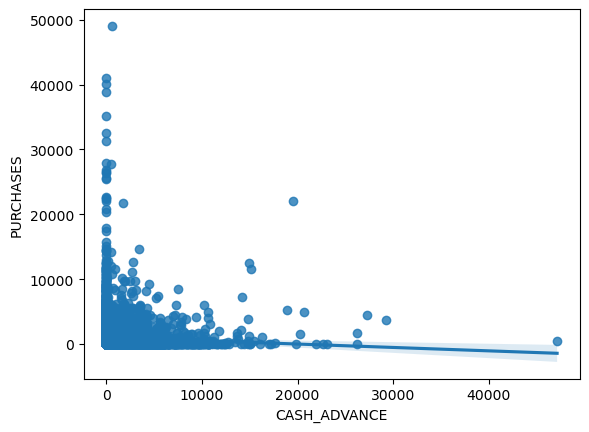

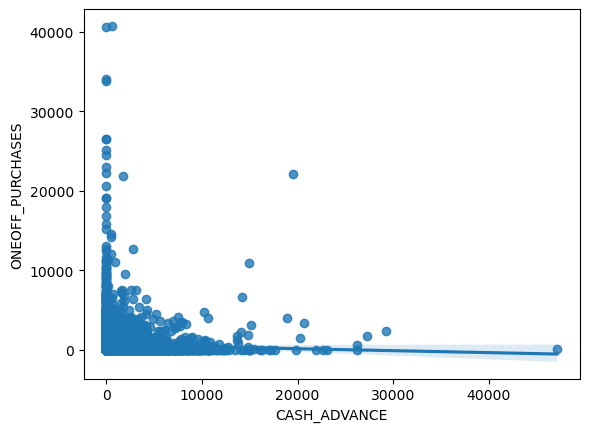

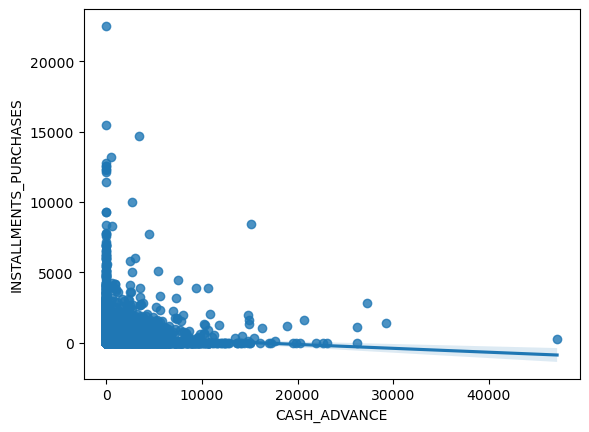

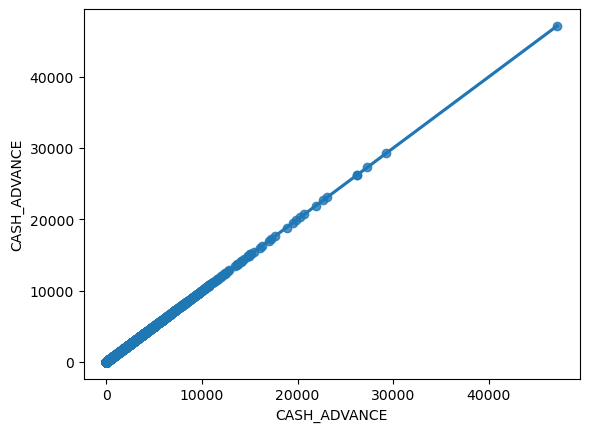

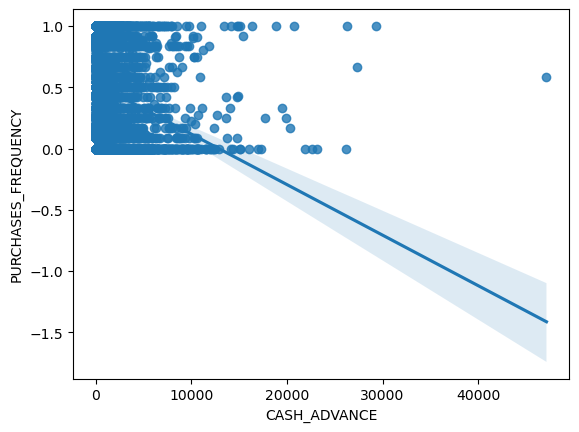

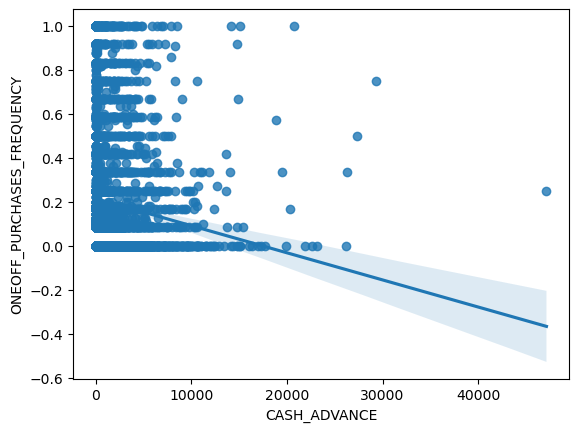

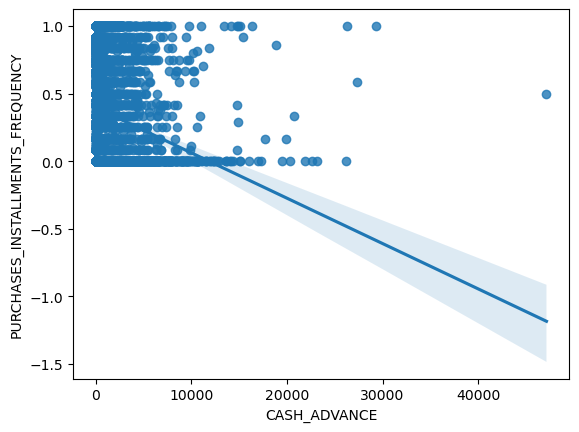

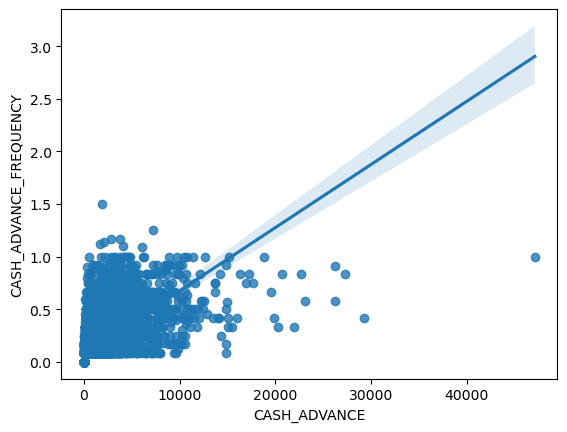

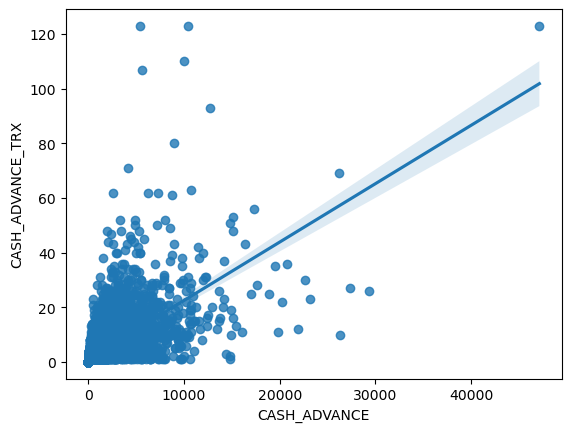

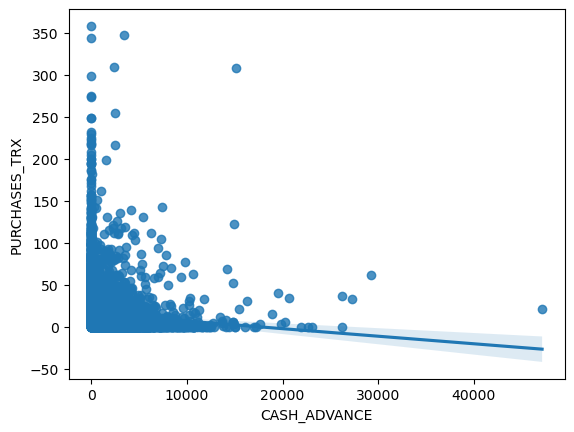

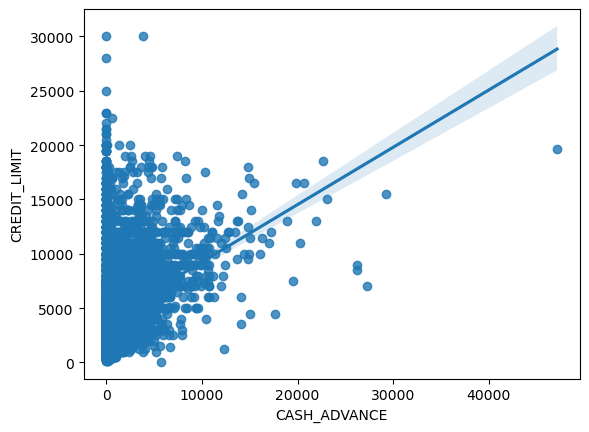

KeyboardInterrupt: 

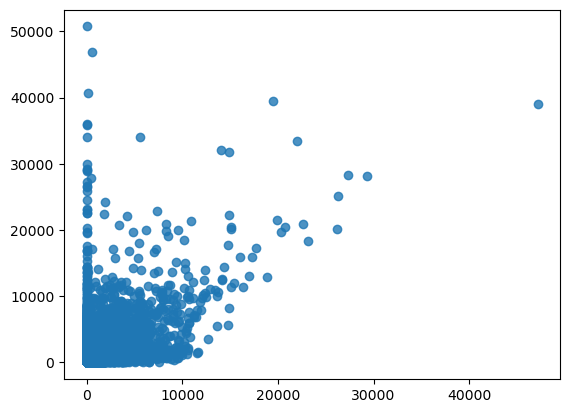

In [79]:
for i in (numeric_columns):
    for j in numeric_columns:
        sns.regplot(data=df, x=df[i], y=df[j])
        plt.show()

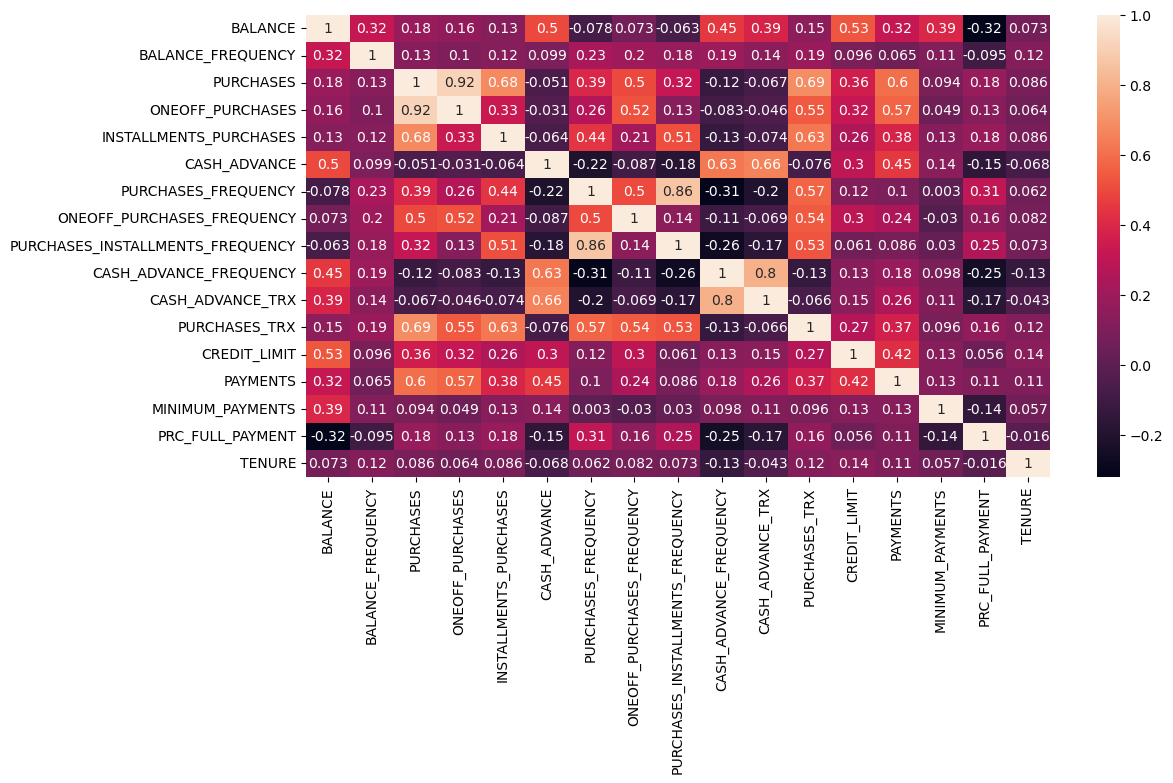

In [83]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# scaling the dataframe

In [88]:
from sklearn.preprocessing import StandardScaler
df1=df.drop("CUST_ID",axis=1)

In [90]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df1)

In [91]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [92]:
from sklearn.decomposition import PCA

In [94]:
pca=PCA(n_components=2)

In [95]:
principal_components=pca.fit_transform(scaled_df)

In [96]:
pca_df=pd.DataFrame(data=principal_components,columns=["pca1","pca2"])

In [97]:
pca_df

pca1      pca2
0    -1.682257 -1.076309
1    -1.138107  2.506571
2     0.969742 -0.383506
3    -0.873564  0.043211
4    -1.599440 -0.688423
...        ...       ...
8945 -0.359815 -2.016221
8946 -0.564539 -1.639188
8947 -0.926388 -1.810854
8948 -2.336690 -0.657985
8949 -0.556584 -0.400622

[8950 rows x 2 columns]

In [ ]:
# Findng K value using Elbow method

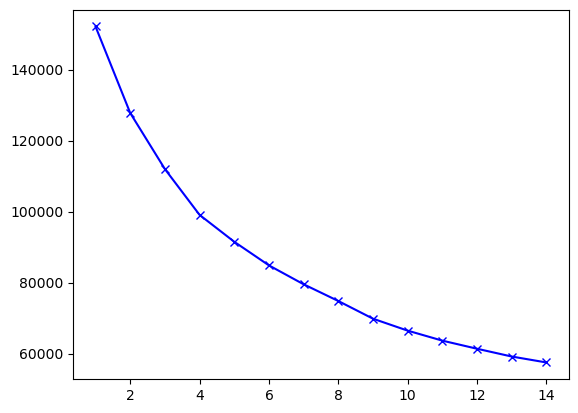

In [104]:
inertia=[]
range_val=range(1,15)
for i in range_val:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmeans.inertia_)
plt.plot(range_val,inertia,"bx-")
plt.show()


In [119]:
kmeans_model=KMeans(n_clusters=6)
kmeans_model.fit_predict(scaled_df)

array([0, 2, 4, ..., 5, 0, 0])

In [120]:
pca_df["cluster"]=kmeans_model.labels_

In [121]:
pca_df

pca1      pca2  cluster
0    -1.682257 -1.076309        0
1    -1.138107  2.506571        2
2     0.969742 -0.383506        4
3    -0.873564  0.043211        0
4    -1.599440 -0.688423        0
...        ...       ...      ...
8945 -0.359815 -2.016221        5
8946 -0.564539 -1.639188        5
8947 -0.926388 -1.810854        5
8948 -2.336690 -0.657985        0
8949 -0.556584 -0.400622        0

[8950 rows x 3 columns]

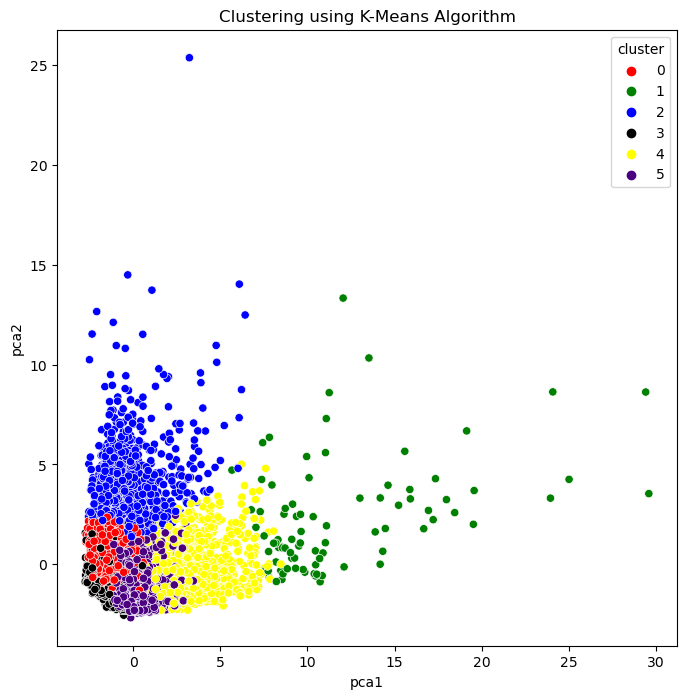

In [122]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df,palette=['red','green','blue','black','yellow','indigo'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [124]:
cluster_centers=pd.DataFrame(data=kmeans_model.cluster_centers_,columns=df1.columns)

In [125]:
cluster_centers

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.014757           0.371990  -0.344788         -0.223275   
1  1.430238           0.419467   6.915048          6.083034   
2  1.593049           0.377248  -0.209263         -0.151315   
3 -0.697814          -2.122602  -0.312952         -0.230962   
4  0.136142           0.426932   0.921291          0.872394   
5 -0.397342           0.307819  -0.067239         -0.245171   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.404950     -0.084636            -0.825119   
1                5.172266      0.038778             1.090699   
2               -0.216897      1.942082            -0.456216   
3               -0.315553     -0.306789            -0.559723   
4                0.575603     -0.310516             1.087304   
5                0.291402     -0.365492             0.966178   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.334680                         -0.769951   
1                    1.879303                          1.049413   
2                   -0.189068                         -0.412127   
3                   -0.418763                         -0.464719   
4                    1.839538                          0.540659   
5                   -0.376679                          1.141074   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.128431         -0.030240      -0.470109     -0.335562   
1               -0.249227         -0.038166       4.646228      2.198360   
2                1.891066          1.840954      -0.251326      0.962933   
3               -0.484257         -0.357722      -0.425650     -0.209289   
4               -0.407379         -0.320424       1.179480      0.687066   
5               -0.461006         -0.356948       0.122820     -0.329211   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.262335         -0.031105         -0.450938 -0.006792  
1  4.783704          1.080945          0.824001  0.334613  
2  0.767242          0.512394         -0.391972 -0.090907  
3 -0.220768         -0.255967          0.262172 -0.165241  
4  0.372862         -0.025723          0.434264  0.271169  
5 -0.251105         -0.056176          0.341981 -0.027524

In [126]:
cluster_df=pd.concat([df1,pd.DataFrame({"Cluster":kmeans_model.labels_})],axis=1)

In [127]:
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        4  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        5  
89

<AxesSubplot:xlabel='Cluster', ylabel='count'>

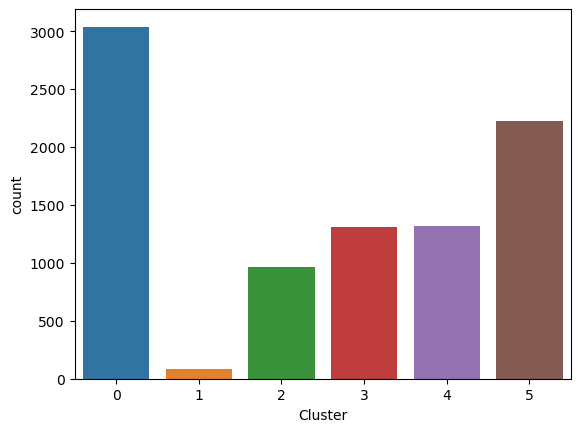

In [128]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)


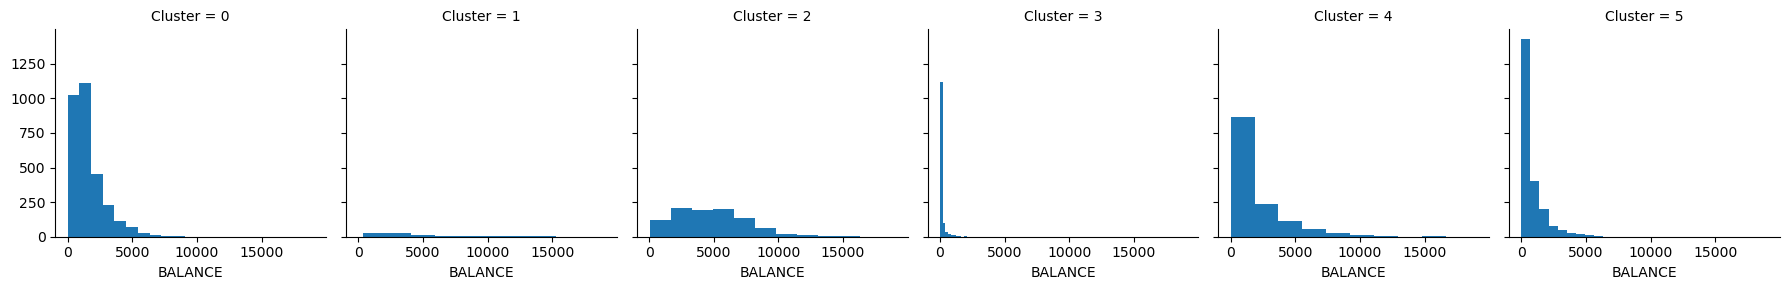

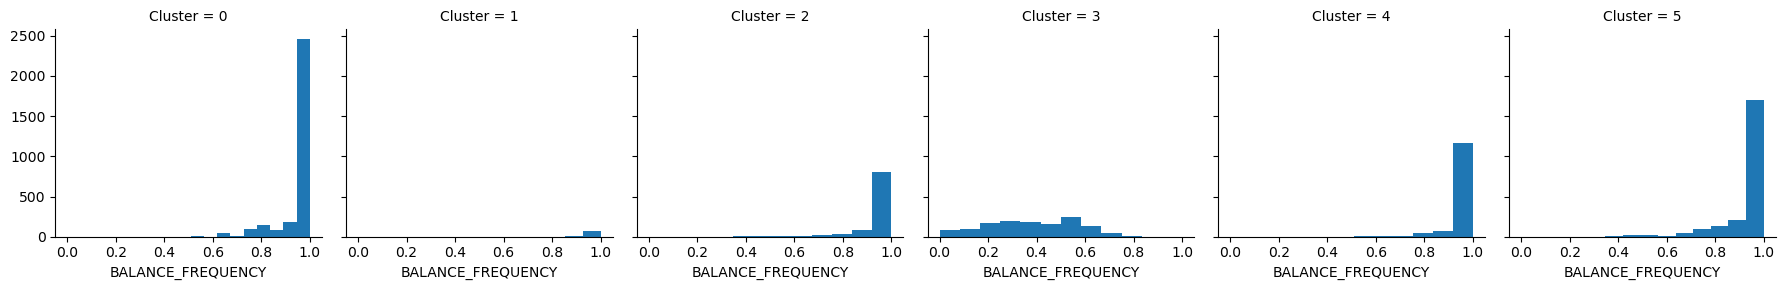

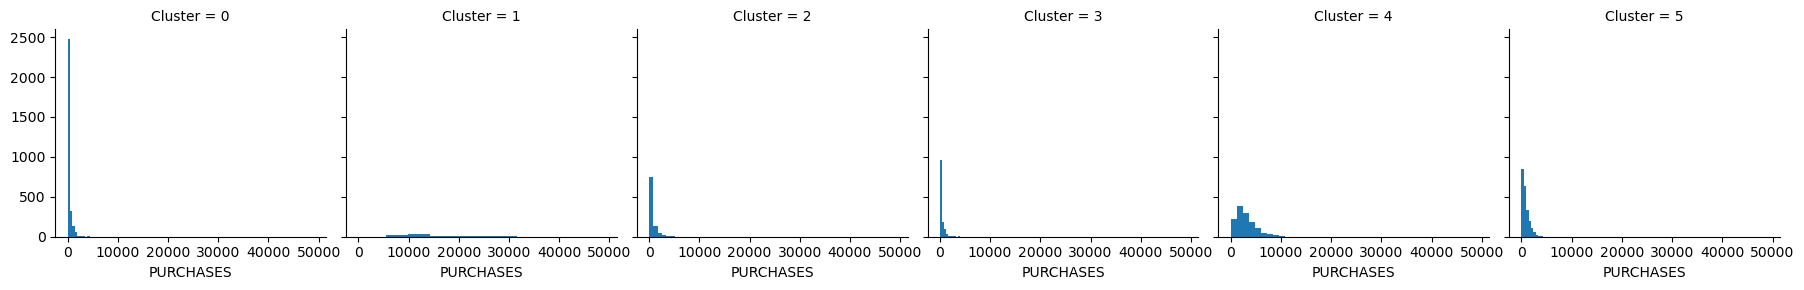

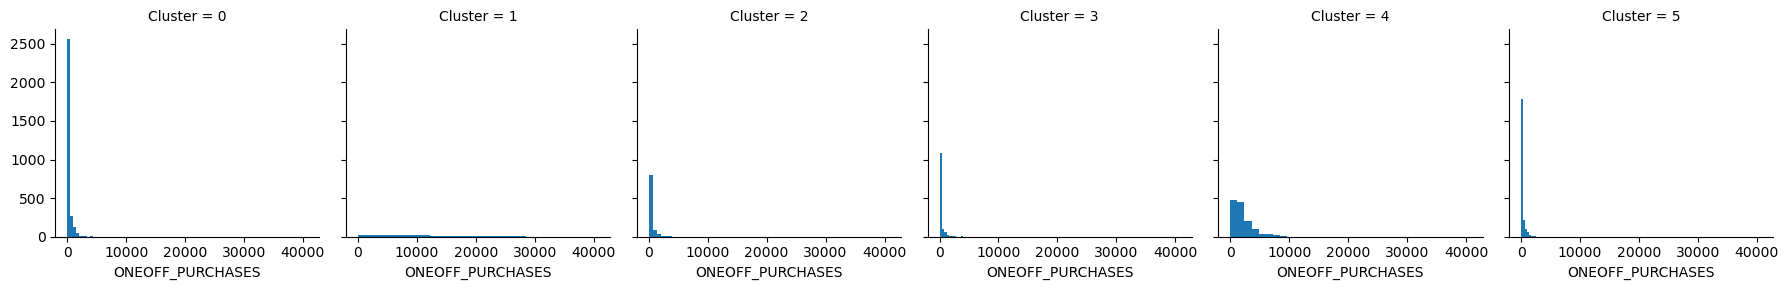

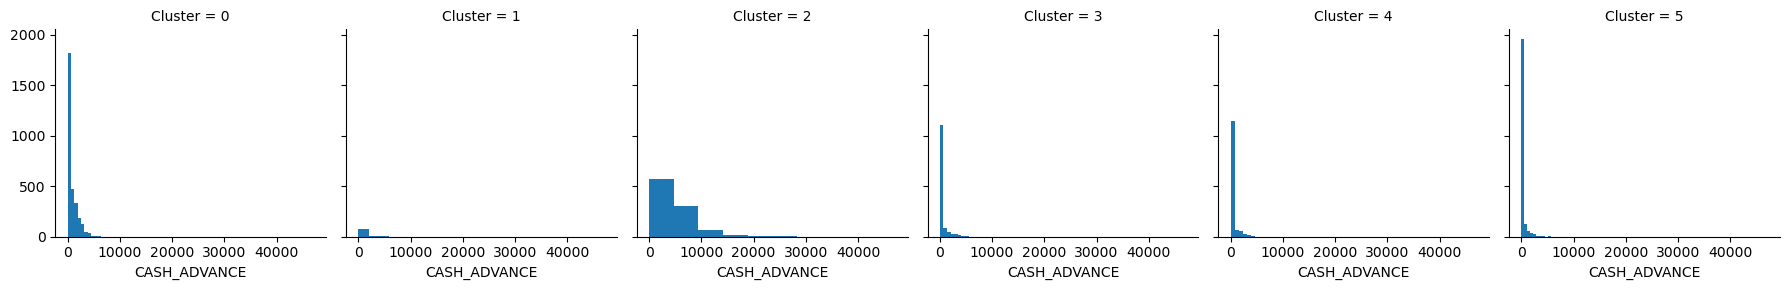

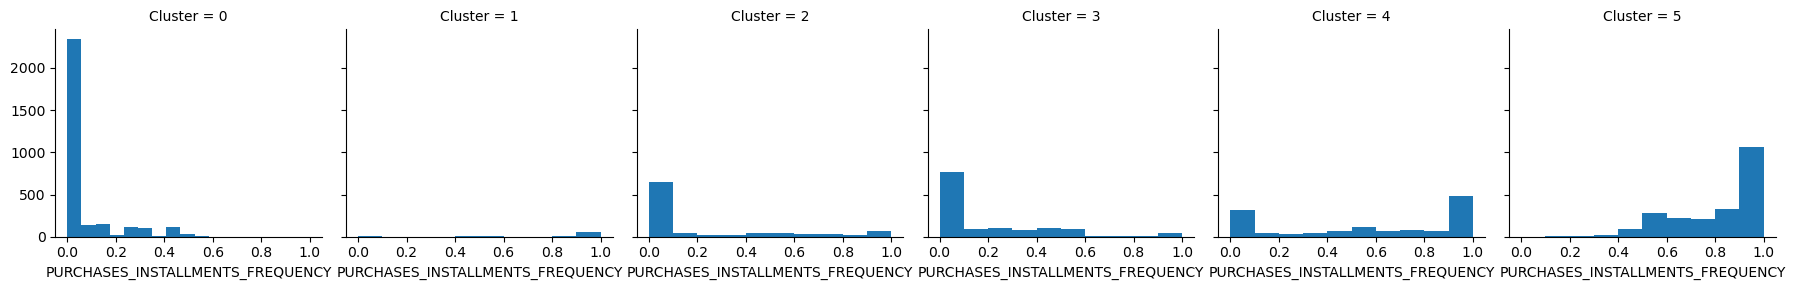

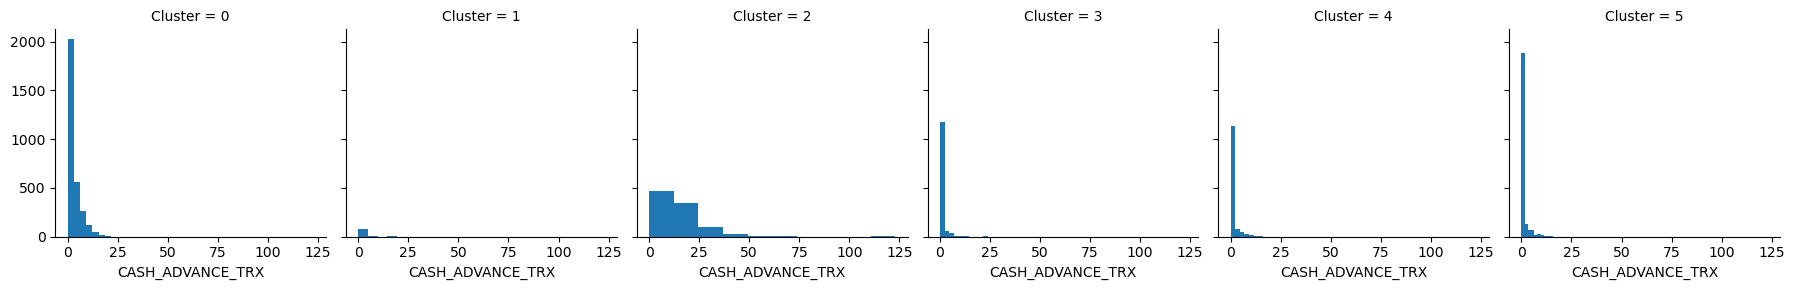

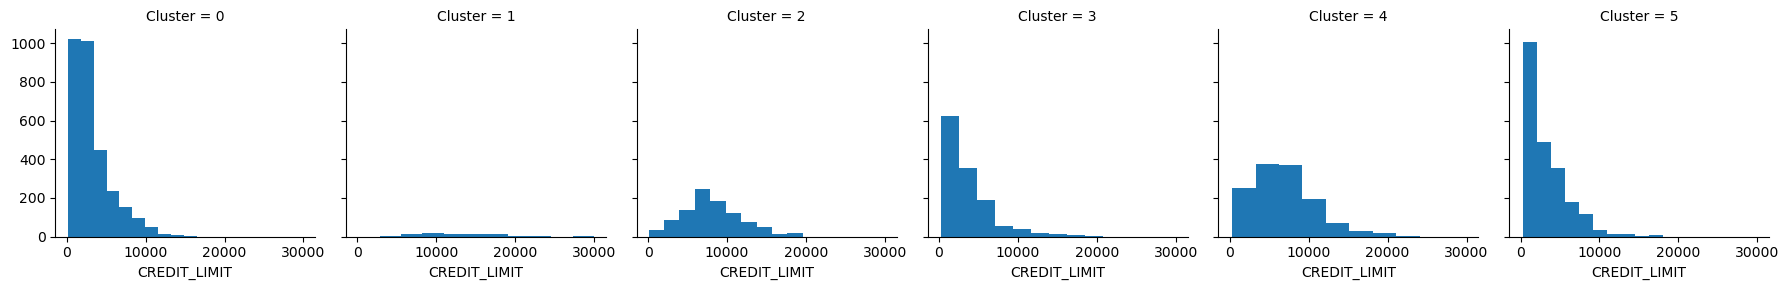

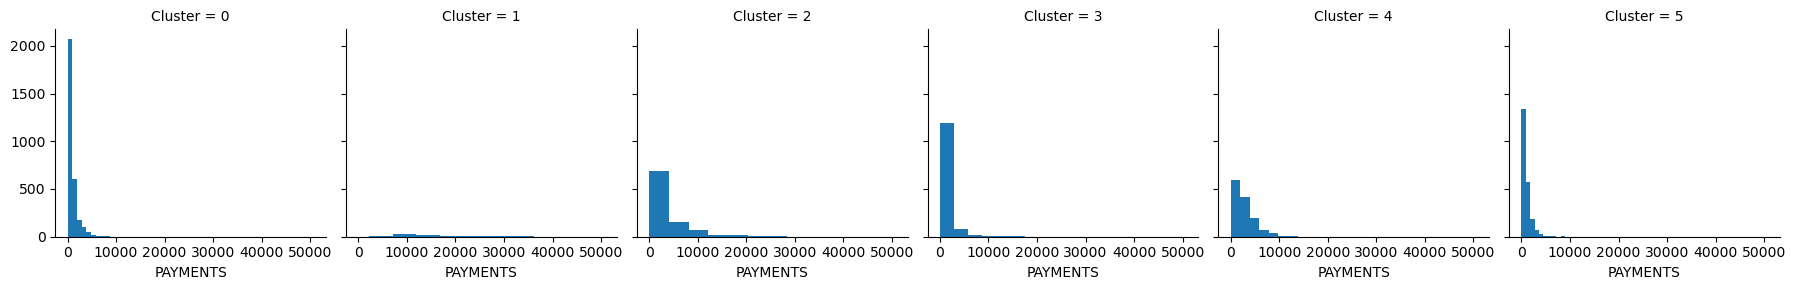

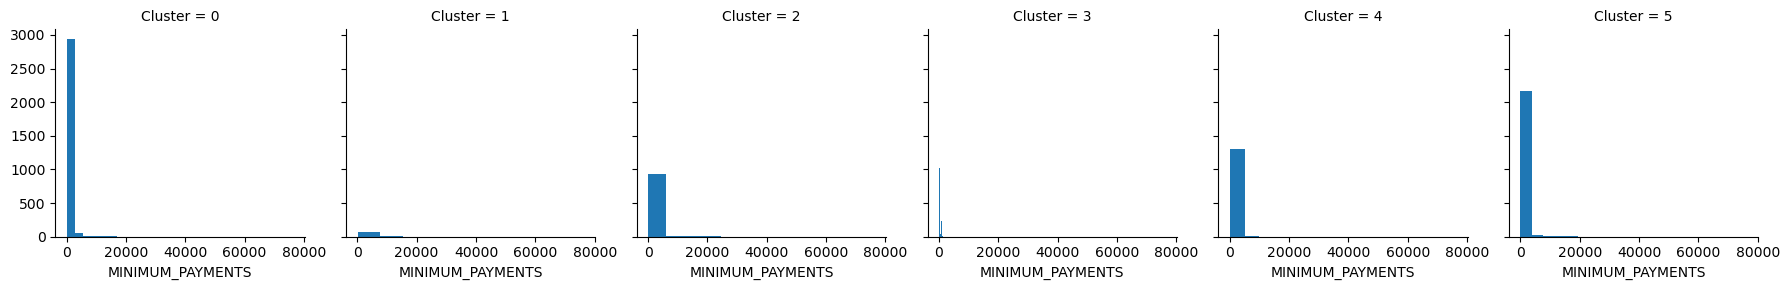

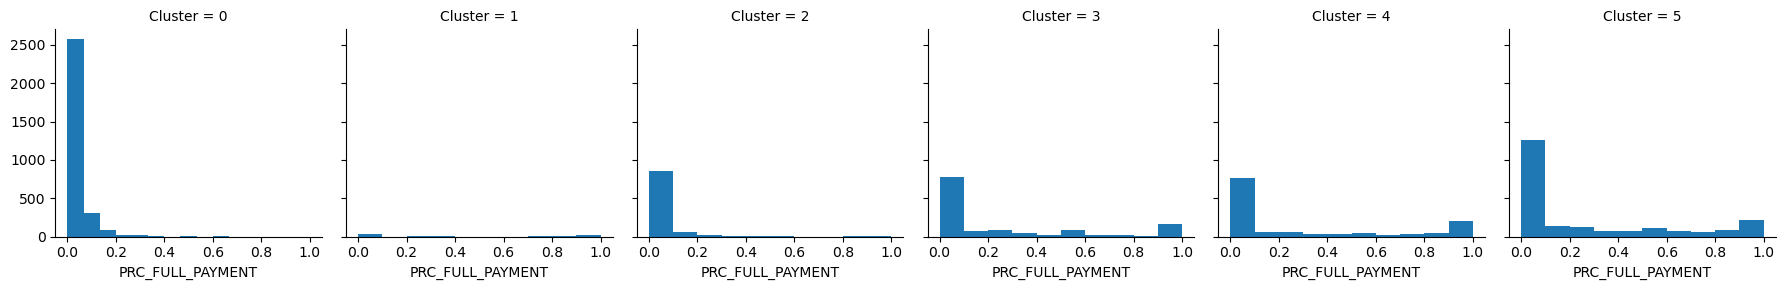

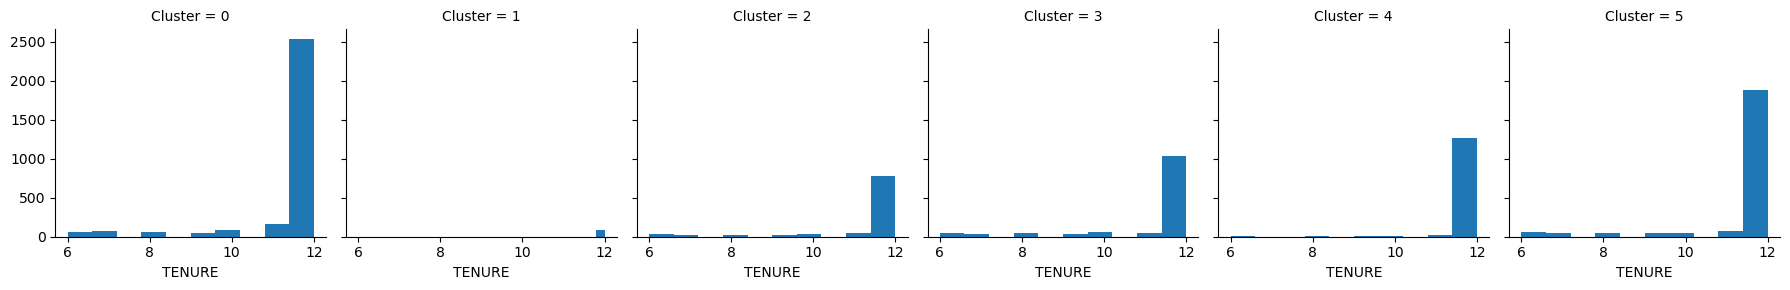

In [129]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [130]:
# Saving the model
import joblib
joblib.dump(kmeans_model,"kmeans_model.pkl")

['kmeans_model.pkl']

In [132]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

In [ ]:
# Now lets predict clusters using Decision Tree

In [154]:
# Split the dataset
X=cluster_df.drop("Cluster",axis=1)
Y=cluster_df.Cluster
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=10)

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [144]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [156]:
accuracy=accuracy_score(y_pred,y_test)

In [170]:
print(f"**Accuracy**\n   {round((accuracy*100),2)}%")

**Accuracy**
   92.96%


In [172]:
print("Confution Matrix\n",confusion_matrix(y_test,y_pred))

Confution Matrix
 [[603   0  16   1   4   5]
 [  0  19   0   0   1   0]
 [ 15   0 159   0   9   4]
 [  7   0   0 236   5   2]
 [  6   4   1   3 220  14]
 [  7   0   1   5  16 427]]


In [174]:
print("Classification Report\n",classification_report(y_pred,y_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       638
           1       0.95      0.83      0.88        23
           2       0.85      0.90      0.87       177
           3       0.94      0.96      0.95       245
           4       0.89      0.86      0.87       255
           5       0.94      0.94      0.94       452

    accuracy                           0.93      1790
   macro avg       0.92      0.91      0.91      1790
weighted avg       0.93      0.93      0.93      1790



In [181]:
filename = 'final_model.sav'
joblib.dump(dt, filename)
 
 
#load the model
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(f"**Accuracy**\n   {round((accuracy*100),2)}%")

**Accuracy**
   92.96%
